# ÏÑ±Ï£ºÎãò code Ïã§Ìñâ Í≤∞Í≥º

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# --- ÏÇ¨Ï†Ñ ÏÑ§Ï†ï ---
# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Mac: AppleGothic, Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

In [3]:
# 2. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ (Ïã§ÌñâÌïòÎäî ÏúÑÏπòÏóê CSV ÌååÏùºÏù¥ Ìï®Íªò ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§)
try:
    file_name = '19+ ÏõπÌà∞ ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Î∏åÎûúÎìú Ïù∏Ïãù Î≥ÄÌôî Ï°∞ÏÇ¨ ÏÑ§Î¨∏(ÏùëÎãµ).xlsx'
    df = pd.read_excel(file_name)
    print("ÌååÏùºÏùÑ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§.")
except FileNotFoundError:
    print(f"'{file_name}'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÏΩîÎìúÏôÄ Í∞ôÏùÄ Ìè¥ÎçîÏóê ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    df = None # ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ Ïù¥ÌõÑ ÏΩîÎìú Ïã§Ìñâ Î∞©ÏßÄ

ÌååÏùºÏùÑ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§.


In [ ]:
# 3. Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎ™Ö Ï†ïÏùò
if df is not None:
    age_col = '1. Ïó∞Î†πÎåÄÍ∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?'
    child_col = '5. ÌòÑÏû¨ ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄÍ∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?'
    image_col = "6. 'ÎÑ§Ïù¥Î≤Ñ' ÌïòÎ©¥ Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎÇòÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)"
    freq_col = '14. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?'
    impact_col = '25. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ ÎèÖÏûêÏ∏µÍπåÏßÄ Í≥†Î†§Ìïú Îã§ÏñëÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?'
    # concern_col = 'Í∑ÄÌïòÏùò ÏûêÎÖÄ(ÎòêÎäî Ï£ºÎ≥Ä ÎØ∏ÏÑ±ÎÖÑÏûê)Í∞Ä ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïù¥Ïö© Ïãú, ÏùòÎèÑÏπò ÏïäÍ≤å Ïó∞Î†πÏóê ÎßûÏßÄ ÏïäÎäî ÏΩòÌÖêÏ∏†Ïóê ÎÖ∏Ï∂úÎê† Í∞ÄÎä•ÏÑ±Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò Ïö∞Î†§ÌïòÏã≠ÎãàÍπå?' # ÏòàÏô∏ ÏÇ¨Ïú† - Î¨∏Ìï≠ ÏóÜÏùå
    # loyalty_col = 'ÏïûÏúºÎ°úÎèÑ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º Í≥ÑÏÜç Ïù¥Ïö©Ìï† ÏùòÌñ•Ïù¥ ÏûàÏúºÏã≠ÎãàÍπå?' # ÏòàÏô∏ ÏÇ¨Ïú† - ÎãµÎ≥Ä ÏóÜÏùå
    reason_col = '18. ÏõπÌà∞ÏùÑ Î≥¥Îäî Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏÑ∏Ïöî)'


In [17]:
# --- Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Ìï®ÏàòÎì§ ---
# Í∑∏ÎûòÌîÑÍ∞Ä Ïó¨Îü¨ Í∞úÏù¥ÎØÄÎ°ú Ìï®ÏàòÎ°ú Î¨∂Ïñ¥ Í¥ÄÎ¶¨Ìï©ÎãàÎã§.
def plot_age_distribution(df):
    """Ï∞®Ìä∏ 1: ÏùëÎãµÏûê Ïó∞Î†πÎåÄ Î∂ÑÌè¨"""
    plt.figure(figsize=(10, 6))
    age_order = ['10ÎåÄ', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ Ïù¥ÏÉÅ']
    sns.countplot(y=df[age_col], order=age_order, palette='viridis')
    plt.title('ÏùëÎãµÏûê Ïó∞Î†πÎåÄ Î∂ÑÌè¨', fontsize=16)
    plt.xlabel('ÏùëÎãµÏûê Ïàò (Î™Ö)', fontsize=12)
    plt.ylabel('Ïó∞Î†πÎåÄ', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [18]:
def plot_brand_image(df):
    """Ï∞®Ìä∏ 2: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïó∞ÏÉÅ Ïù¥ÎØ∏ÏßÄ"""
    image_responses = df[image_col].dropna().apply(lambda x: x.split(', '))
    image_counts = pd.Series([item for sublist in image_responses for item in sublist]).value_counts()
    plt.figure(figsize=(12, 8))
    image_counts.sort_values().plot(kind='barh', color=sns.color_palette('mako', len(image_counts)))
    plt.title('ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïó∞ÏÉÅ Ïù¥ÎØ∏ÏßÄ (Î≥µÏàò ÏùëÎãµ)', fontsize=16)
    plt.xlabel('ÏùëÎãµ Ïàò', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [19]:
def plot_impact_by_frequency(df):
    """Ï∞®Ìä∏ 3: Ïù¥Ïö© ÎπàÎèÑÏóê Îî∞Î•∏ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ ÏòÅÌñ• Ïù∏Ïãù"""
    df_copy = df.copy()
    freq_order = ['Í±∞Ïùò Îß§Ïùº', 'Ï£º 4~5Ìöå', 'Ï£º 2~3Ìöå', 'Ï£º 1Ìöå', 'Ïõî 2~3Ìöå', 'Ïõî 1Ìöå Ïù¥Ìïò']
    impact_map = {1: 'Îß§Ïö∞ Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•', 2: 'Îã§ÏÜå Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•', 3: 'ÏòÅÌñ• ÏóÜÏùå(Î¨¥Í¥ÄÌï®)', 4: 'Îã§ÏÜå Í∏çÏ†ïÏ†Å ÏòÅÌñ•', 5: 'Îß§Ïö∞ Í∏çÏ†ïÏ†Å ÏòÅÌñ•'}
    df_copy[impact_col] = pd.to_numeric(df_copy[impact_col], errors='coerce').map(impact_map)

    crosstab_df = pd.crosstab(df_copy[freq_col], df_copy[impact_col])
    crosstab_df = crosstab_df.reindex(index=freq_order, columns=impact_map.values()).fillna(0)
    crosstab_norm = crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

    crosstab_norm.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='coolwarm_r', width=0.8)
    plt.title('Ïù¥Ïö© ÎπàÎèÑÏóê Îî∞Î•∏ 19+ ÏΩòÌÖêÏ∏†Ïùò Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ ÏòÅÌñ• Ïù∏Ïãù', fontsize=16)
    plt.xlabel('ÏùëÎãµ ÎπÑÏú® (%)', fontsize=12)
    plt.ylabel('Ïù¥Ïö© ÎπàÎèÑ', fontsize=12)
    plt.legend(title='Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ ÏòÅÌñ•', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [20]:
# def plot_parent_comparison(df):
#     """Ï∞®Ìä∏ 4: 40ÎåÄ Î∂ÄÎ™® Í∑∏Î£πÍ≥º Ï†ÑÏ≤¥ ÏùëÎãµÏûê Ïù∏Ïãù ÎπÑÍµê"""
#     df_copy = df.copy()
#     df_copy[concern_col] = pd.to_numeric(df_copy[concern_col], errors='coerce')
#     df_copy[loyalty_col] = pd.to_numeric(df_copy[loyalty_col], errors='coerce')

#     parents_40s = df_copy[(df_copy[age_col] == '40ÎåÄ') & (df_copy[child_col] == 'Ïòà')]
    
#     concern_avg_total = df_copy[concern_col].mean()
#     loyalty_avg_total = df_copy[loyalty_col].mean()
#     concern_avg_parents = parents_40s[concern_col].mean()
#     loyalty_avg_parents = parents_40s[loyalty_col].mean()

#     comparison_data = pd.DataFrame({
#         'Ï†ÑÏ≤¥ ÌèâÍ∑†': [concern_avg_total, loyalty_avg_total],
#         '40ÎåÄ Î∂ÄÎ™® Í∑∏Î£π ÌèâÍ∑†': [concern_avg_parents, loyalty_avg_parents]
#     }, index=['ÏûêÎÖÄ ÎÖ∏Ï∂ú Ïö∞Î†§ÎèÑ', 'ÏÑúÎπÑÏä§ ÏßÄÏÜç Ïù¥Ïö© ÏùòÌñ•'])

#     comparison_data.plot(kind='bar', figsize=(10, 7), rot=0, colormap='winter')
#     plt.title('40ÎåÄ Î∂ÄÎ™® Í∑∏Î£πÍ≥º Ï†ÑÏ≤¥ ÏùëÎãµÏûê Ïù∏Ïãù ÎπÑÍµê', fontsize=16)
#     plt.ylabel('ÌèâÍ∑† Ï†êÏàò (5Ï†ê ÎßåÏ†ê)', fontsize=12)
#     plt.xlabel('')
#     plt.xticks(fontsize=12)
#     plt.legend(title='ÏùëÎãµÏûê Í∑∏Î£π')
#     plt.grid(axis='y', linestyle='--', alpha=0.6)
#     for i, v in enumerate(comparison_data['Ï†ÑÏ≤¥ ÌèâÍ∑†']):
#         if pd.notna(v): plt.text(i - 0.2, v + 0.05, f'{v:.2f}', color='blue', fontweight='bold')
#     for i, v in enumerate(comparison_data['40ÎåÄ Î∂ÄÎ™® Í∑∏Î£π ÌèâÍ∑†']):
#         if pd.notna(v): plt.text(i + 0.05, v + 0.05, f'{v:.2f}', color='green', fontweight='bold')
#     plt.show()


In [21]:
def plot_usage_reason(df):
    """Ï∞®Ìä∏ 5: ÏÑ±Ïù∏ ÎåÄÏÉÅ ÏûëÌíà Ïù¥Ïö© Ïù¥Ïú†"""
    reason_responses = df[reason_col].dropna().apply(lambda x: x.split(', '))
    reason_counts = pd.Series([item for sublist in reason_responses for item in sublist]).value_counts()
    plt.figure(figsize=(12, 8))
    reason_counts.sort_values().plot(kind='barh', color=sns.color_palette('rocket', len(reason_counts)))
    plt.title('ÏÑ±Ïù∏ ÎåÄÏÉÅ ÏûëÌíà Ïù¥Ïö© Ïù¥Ïú† (Î≥µÏàò ÏùëÎãµ)', fontsize=16)
    plt.xlabel('ÏùëÎãµ Ïàò', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


--- Ï∞®Ìä∏ 1: ÏùëÎãµÏûê Ïó∞Î†πÎåÄ Î∂ÑÌè¨ ---


C:\Users\HSJ\AppData\Local\Temp\ipykernel_44240\3877078876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[age_col], order=age_order, palette='viridis')


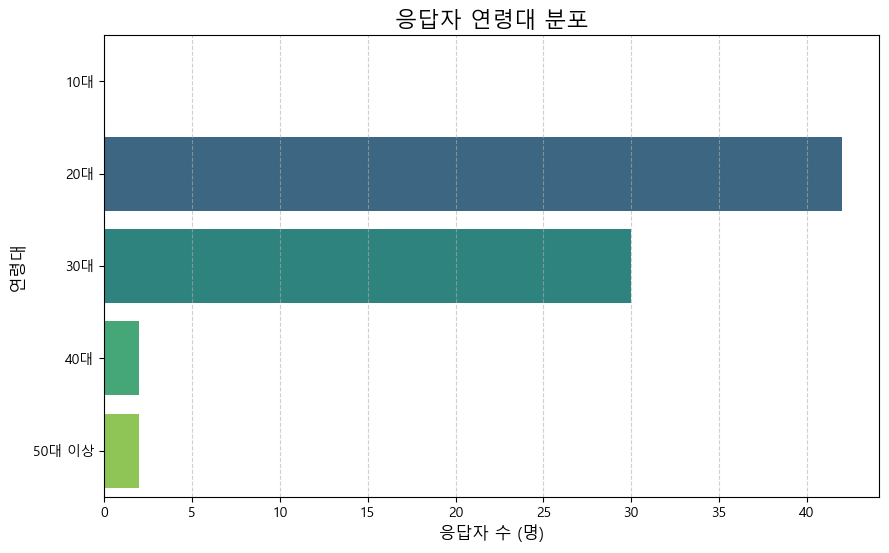


--- Ï∞®Ìä∏ 2: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïó∞ÏÉÅ Ïù¥ÎØ∏ÏßÄ ---


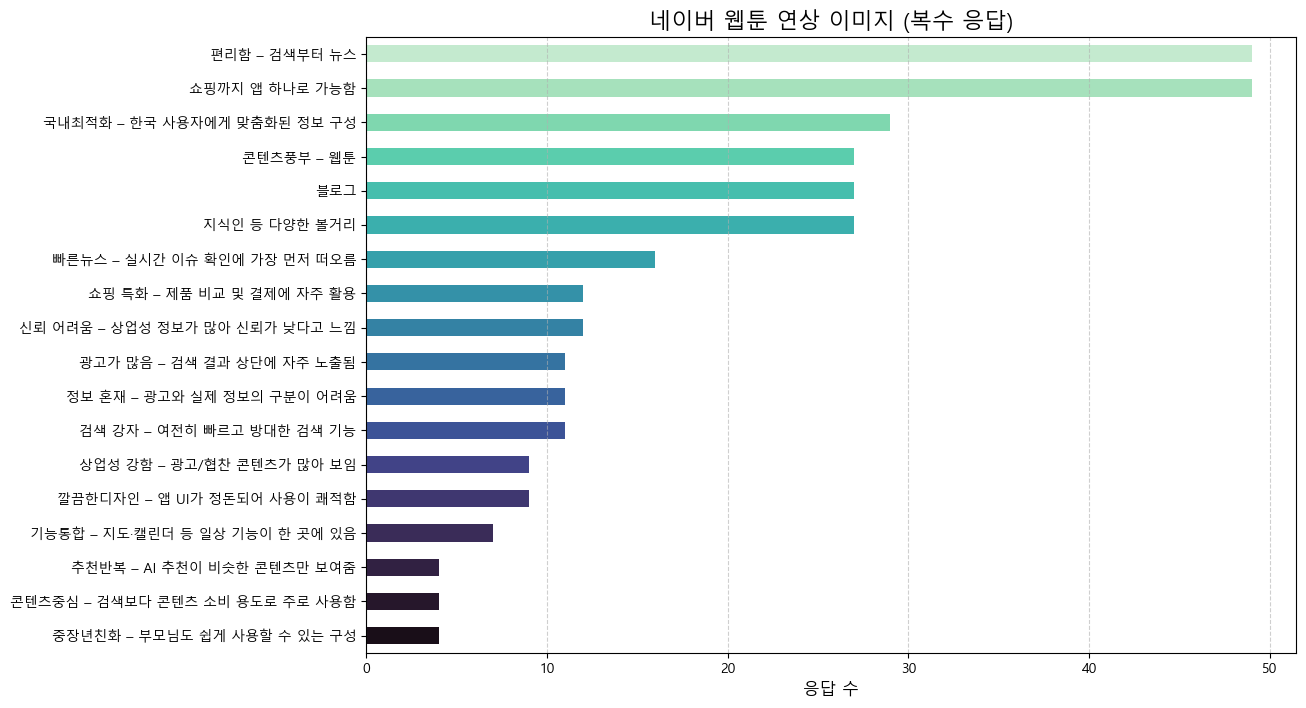


--- Ï∞®Ìä∏ 3: Ïù¥Ïö© ÎπàÎèÑÏóê Îî∞Î•∏ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ ÏòÅÌñ• Ïù∏Ïãù ---


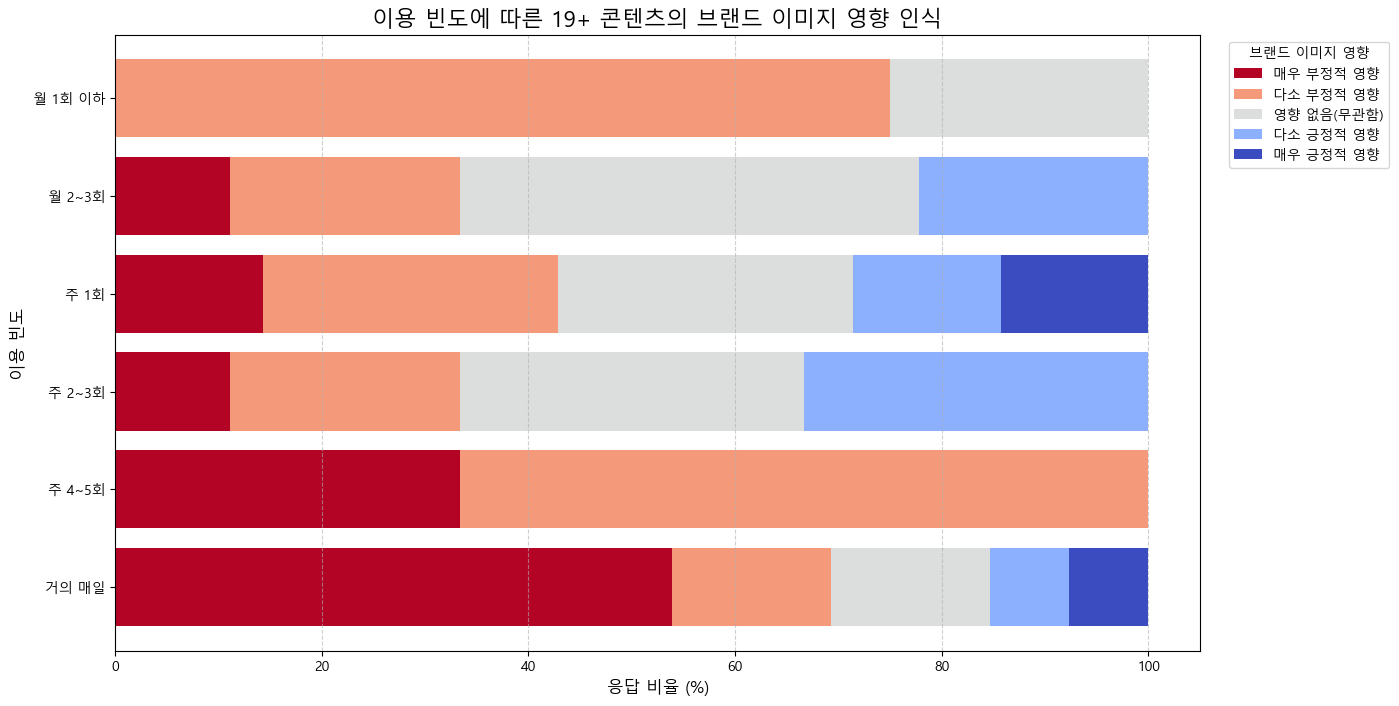


--- Ï∞®Ìä∏ 5: ÏÑ±Ïù∏ ÎåÄÏÉÅ ÏûëÌíà Ïù¥Ïö© Ïù¥Ïú† ---


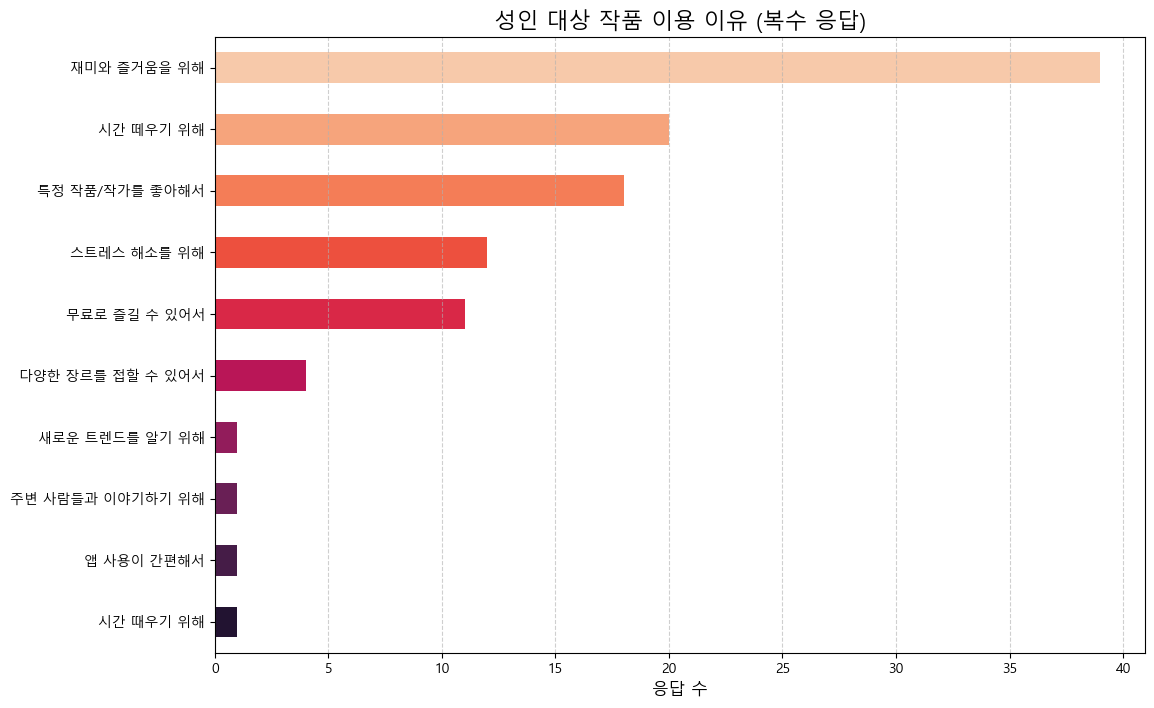

In [22]:
# --- ÏΩîÎìú Ïã§Ìñâ ---
if df is not None:
    print("--- Ï∞®Ìä∏ 1: ÏùëÎãµÏûê Ïó∞Î†πÎåÄ Î∂ÑÌè¨ ---")
    plot_age_distribution(df)
    print("\n--- Ï∞®Ìä∏ 2: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïó∞ÏÉÅ Ïù¥ÎØ∏ÏßÄ ---")
    plot_brand_image(df)
    print("\n--- Ï∞®Ìä∏ 3: Ïù¥Ïö© ÎπàÎèÑÏóê Îî∞Î•∏ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ ÏòÅÌñ• Ïù∏Ïãù ---")
    plot_impact_by_frequency(df)
    #print("\n--- Ï∞®Ìä∏ 4: 40ÎåÄ Î∂ÄÎ™® Í∑∏Î£πÍ≥º Ï†ÑÏ≤¥ ÏùëÎãµÏûê Ïù∏Ïãù ÎπÑÍµê ---")
    #plot_parent_comparison(df)
    print("\n--- Ï∞®Ìä∏ 5: ÏÑ±Ïù∏ ÎåÄÏÉÅ ÏûëÌíà Ïù¥Ïö© Ïù¥Ïú† ---")
    plot_usage_reason(df)

In [23]:
# Ïã§Ï†ú Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print(df.columns.tolist())

['ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ', "Í∞úÏù∏Ï†ïÎ≥¥ ÏàòÏßë Î∞è Ïù¥Ïö© ÎèôÏùò ÏïàÎÇ¥\nÏïàÎÖïÌïòÏÑ∏Ïöî. Î≥∏ ÏÑ§Î¨∏Ïóê Ï∞∏Ïó¨Ìï¥Ï£ºÏÖîÏÑú ÏßÑÏã¨ÏúºÎ°ú Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§. ÏÑ§Î¨∏ ÏãúÏûëÏóê ÏïûÏÑú, ÏùëÎãµÏûêÎãòÏùò ÏÜåÏ§ëÌïú Í∞úÏù∏Ï†ïÎ≥¥ ÏàòÏßë Î∞è Ïù¥Ïö©Ïóê Í¥ÄÌïú ÎèôÏùòÎ•º Î∞õÍ≥†Ïûê Ìï©ÎãàÎã§. ÏïÑÎûò ÎÇ¥Ïö©ÏùÑ ÏûêÏÑ∏Ìûà ÏùΩÏñ¥Î≥¥ÏãúÍ≥† ÎèôÏùò Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï¥Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.\n1. Í∞úÏù∏Ï†ïÎ≥¥ ÏàòÏßë Î∞è Ïù¥Ïö© Î™©Ï†Å Î≥∏ ÏÑ§Î¨∏Ï°∞ÏÇ¨Îäî 'ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏΩòÌÖêÏ∏†ÏôÄ ÎÑ§Ïù¥Î≤Ñ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄ'Ïóê ÎåÄÌïú ÏÇ¨Ïö©Ïûê Ïó¨Îü¨Î∂ÑÏùò Ïù∏ÏãùÍ≥º Í≤ΩÌóòÏùÑ ÌååÏïÖÌïòÏó¨, Îçî ÎÇòÏùÄ ÏÑúÎπÑÏä§ Í∞úÏÑ† Î∞è Í¥ÄÎ†® Ïó∞Íµ¨Î•º ÏúÑÌïú Í∏∞Ï¥à ÏûêÎ£åÎ°ú ÌôúÏö©ÌïòÎäî Í≤ÉÏùÑ Î™©Ï†ÅÏúºÎ°ú Ìï©ÎãàÎã§.\n2. ÏàòÏßëÌïòÎäî Í∞úÏù∏Ï†ïÎ≥¥ Ìï≠Î™©\nÏùëÎãµÏûê Ï†ïÎ≥¥: Ïó∞Î†πÎåÄ, ÏÑ±Î≥Ñ, ÌòÑÏû¨ ÏßÅÏóÖ, Í≤∞Ìòº Ïó¨Î∂Ä, ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄ Ïú†Î¨¥ \nÏÑ§Î¨∏ ÏùëÎãµ ÎÇ¥Ïö©: ÎÑ§Ïù¥Î≤Ñ Î∏åÎûúÎìú Î∞è ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Ïù∏Ïãù, ÏõπÌà∞ Ïù¥Ïö© ÌñâÌÉú, ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÇ¨Ïö© Í≤ΩÌóò, ÏΩòÌÖêÏ∏†Ïóê ÎåÄÌïú Ïù∏Ïãù Î∞è Í≤ΩÌóò, Í¥ÄÎ†® ÏùòÍ≤¨ Îì± \n3. Í∞

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏßÑÌñâ

| Î¨∏Ìï≠ Î≤àÌò∏ | ÏßàÎ¨∏ ÎÇ¥Ïö©                                                                                                         | Ï∂îÏ≤ú Ïª¨ÎüºÎ™Ö                                        | Ïù∏ÏΩîÎî© Î∞©Ïãù                 |
| ----- | ------------------------------------------------------------------------------------------------------------- | --------------------------------------------- | ---------------------- |
| 1     | Ïó∞Î†πÎåÄÍ∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?                                                                                                | `age_group`                                   | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎòêÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©     |
| 2     | ÏÑ±Î≥ÑÏùÑ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?                                                                                               | `gender`                                      | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎòêÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©     |
| 3     | ÌòÑÏû¨ Ïñ¥Îñ§ ÏùºÏùÑ ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?                                                                                             | `occupation`                                  | Ïõê-Ìï´ Ïù∏ÏΩîÎî©                |
| 4     | Í≤∞Ìòº Ïó¨Î∂ÄÎäî Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?                                                                                              | `marital_status`                              | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©                |
| 5     | ÌòÑÏû¨ ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄÍ∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?                                                                                             | `has_minor_children`                          | Ïù¥ÏßÑ Ïù∏ÏΩîÎî© (Ïòà: 1=Ïòà, 0=ÏïÑÎãàÏò§) |
| 6     | 'ÎÑ§Ïù¥Î≤Ñ' ÌïòÎ©¥ Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎÇòÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)                                                     | `naver_image_association`                     | Îã§Ï§ë ÏÑ†ÌÉù Ïõê-Ìï´ Ïù∏ÏΩîÎî©          |
| 7     | Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Ïóê ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?                                                                                 | `naver_service_satisfaction`                  | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî© (Ïòà: 1\~5Ï†ê Ï≤ôÎèÑ)  |
| 8     | ÌèâÏÜå ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)                                                               | `frequent_naver_services`                     | Îã§Ï§ë ÏÑ†ÌÉù Ïõê-Ìï´ Ïù∏ÏΩîÎî©          |
| 9     | ÏµúÍ∑º 1ÎÖÑ ÏïàÏóê ÏõπÌà∞ÏùÑ Î≥∏ Ï†ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?                                                                                      | `webtoon_usage_last_year`                     | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 10    | ÏÇ¨Ïö© Ï§ëÏù∏ ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏûàÎã§Î©¥ Î™®Îëê ÏÑ†ÌÉùÌï¥Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?                                                                             | `webtoon_platforms_used`                      | Îã§Ï§ë ÏÑ†ÌÉù Ïõê-Ìï´ Ïù∏ÏΩîÎî©          |
| 11    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ïñ¥Îñ§ Ïù¥Ïú†Í∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?                                                                             | `reason_not_using_naver_webtoon`              | ÌÖçÏä§Ìä∏ ÎòêÎäî Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©         |
| 11-1  | Ï∂îÌõÑÏóê ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ Ïù¥Ïö©Ìï¥Î≥º ÏÉùÍ∞ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?                                                                                   | `intent_to_use_naver_webtoon`                 | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 12    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏñºÎßàÎÇò Ïò§Îû´ÎèôÏïà ÏÇ¨Ïö©Ìï¥Ïò§ÏÖ®ÎÇòÏöî?                                                                                     | `naver_webtoon_usage_duration`                | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©                |
| 13    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÌïòÎ©¥ Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎ•º 3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)                                                  | `naver_webtoon_image_association`             | Îã§Ï§ë ÏÑ†ÌÉù Ïõê-Ìï´ Ïù∏ÏΩîÎî©          |
| 14    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?                                                                                 | `naver_webtoon_usage_frequency`               | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©                |
| 15    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÌïòÎäî ÏõπÌà∞ Ïû•Î•¥Îäî Ïñ¥Îñ§ Í≤É Ïù∏Í∞ÄÏöî?                                                                             | `preferred_webtoon_genre`                     | Ïõê-Ìï´ Ïù∏ÏΩîÎî©                |
| 16    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏΩòÌÖêÏ∏† Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ Ïú†Î£å Í≤∞Ï†ú(Ïòà: Ïø†ÌÇ§ Ï∂©Ï†Ñ, Ïú†Î£å ÌöåÏ∞® Íµ¨Îß§ Îì±)Î•º Ìïú Í≤ΩÌóòÏù¥ ÏûàÏúºÏã≠ÎãàÍπå?                                                   | `has_paid_for_webtoon`                        | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 17    | (Í≤∞Ï†ú Í≤ΩÌóòÏù¥ ÏûàÏúºÏãúÎã§Î©¥) ÏßÄÎÇú 1ÎÖÑ ÎèôÏïà ÏõîÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°ÏùÄ Ïñ¥Îäê Ï†ïÎèÑ ÎêòÏãúÎÇòÏöî?                                                                | `average_monthly_payment`                     | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©Îî©                    |
| 18    | ÏõπÌà∞ÏùÑ Î≥¥Îäî Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏÑ∏Ïöî)                                                                           | `reasons_for_reading_webtoons`                | Îã§Ï§ë ÏÑ†ÌÉù Ïõê-Ìï´ Ïù∏ÏΩîÎî©          |
| 19    | ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïó¥Îûå Í∞ÄÎä•Ìïú ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≥† Í≥ÑÏÖ®ÎÇòÏöî?                                                                        | `aware_of_age_restricted_content`             | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 20    | ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?                                                             | `opinion_on_age_restricted_content`           | Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©                |
| 21    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©Ìï¥Î≥∏ Í≤ΩÌóòÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?                                                                         | `used_age_restricted_content`                 | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 22    | ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏã† Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?                                                                               | `reason_for_using_age_restricted_content`     | ÌÖçÏä§Ìä∏ ÎòêÎäî Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©         |
| 23    | Ïù¥Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?                                                                                     | `reason_for_not_using_age_restricted_content` | ÌÖçÏä§Ìä∏ ÎòêÎäî Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©         |
| 24    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ìè¨Ìï®ÌïòÏó¨ Îã§ÏñëÌïú Ïó∞Î†πÏ∏µÏùÑ Í≥†Î†§Ìïú ÏΩòÌÖêÏ∏†Î•º Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?                                            | `opinion_on_content_for_various_ages`         | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 25    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ ÎèÖÏûêÏ∏µÍπåÏßÄ Í≥†Î†§Ìïú Îã§ÏñëÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?                                    | `impact_on_brand_image`                       | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 25-1  | (Ï£ºÍ¥ÄÏãù) Ïôú Í∑∏Î†áÍ≤å ÎäêÎÅºÏÖ®ÎäîÏßÄ ÏûêÏú†Î°≠Í≤å ÏûëÏÑ±Ìï¥Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî?                                                                          | `reason_for_brand_image_opinion`              | ÌÖçÏä§Ìä∏                    |
| 26    | Ïù¥Îü¨Ìïú ÏΩòÌÖêÏ∏† Íµ¨ÏÑ±(Ïòà: Îã§ÏñëÌïú Ïó∞Î†πÏ∏µ ÎåÄÏÉÅ ÏûëÌíà Ï†úÍ≥µ Îì±)Ïù¥ 'ÎÑ§Ïù¥Î≤Ñ'ÎùºÎäî Í∏∞ÏóÖ Ï†ÑÏ≤¥Ïùò Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?                                | `impact_on_company_brand_image`               | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 26-1  | (Ï£ºÍ¥ÄÏãù) Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏóàÎã§Í≥† ÎäêÎÅºÏã† Ï∏°Î©¥Ïù¥ÎÇò ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî? Í∞ÑÎã®Ìûà ÎßêÏîÄÌï¥ Ï£ºÏÑ∏Ïöî.                                                          | `reason_for_company_brand_image_opinion`      | ÌÖçÏä§Ìä∏                    |
| 27    | ÌÉÄ ÏõπÌà∞ ÌîåÎû´Ìèº(Ïòà: Ïπ¥Ïπ¥Ïò§, Î†àÏßÑÏΩîÎØπÏä§, ÌÉëÌà∞ Îì±)Í≥º ÎπÑÍµêÌñàÏùÑ Îïå, ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÏàòÏúÑÎäî Ïñ¥Îñ§ Ìé∏Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?                                | `comparison_of_age_restricted_content_level`  | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 28    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïù¥Ïö© Í∞ÄÎä•Ìïú ÏûëÌíàÎì§ÏùÑ Ï†ëÌïòÏãúÎ©¥ÏÑú Î∂àÌé∏ÌïòÍ±∞ÎÇò Í∞úÏÑ†ÎêòÏóàÏúºÎ©¥ ÌïòÎäî Ï†êÏù¥ ÏûàÏóàÎÇòÏöî? (ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïù¥Ïö©Ïûê ÎåÄÏÉÅ)                                | `issues_with_age_restricted_content`          | Ïù¥ÏßÑ Ïù∏ÏΩîÎî©                 |
| 29    | (Ï£ºÍ¥ÄÏãù) Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Ïñ¥Îñ§ Ï†êÏù¥ Î∂àÌé∏ÌñàÎäîÏßÄ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?                                                                           | `specific_issues_with_age_restricted_content` | ÌÖçÏä§Ìä∏                    |
| 30    | ÌòÑÏû¨ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Îã§ÏñëÌïú Ïó∞Î†πÎåÄÏùò ÏûëÌíàÎì§ÏùÑ Íµ¨Î∂ÑÌïòÍ≥†, ÏÑ±Ïù∏ ÌôïÏù∏Ïù¥ ÌïÑÏöîÌïú ÏûëÌíàÎì§Ïóê ÎåÄÌïú Ï†ëÍ∑ºÏùÑ Í¥ÄÎ¶¨ÌïòÎäî Í∏∞Îä•(Ïòà: ÏÑ±Ïù∏Ïù∏Ï¶ù, Í≤ÄÏÉâ ÎÖ∏Ï∂ú Î∞©Ïãù Îì±)Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÏãúÎÇòÏöî?           | `satisfaction_with_content_management`        | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 31    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ ÎèÖÏûêÎ•º ÏúÑÌïú ÏûëÌíàÎì§ÏùÑ Îçî ÏâΩÍ≤å Î∞úÍ≤¨ÌïòÍ±∞ÎÇò Í¥ÄÎ†® Ï∂îÏ≤úÏù¥ ÎäòÏñ¥ÎÇúÎã§Î©¥ (ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏù¥ Îçî ÎààÏóê ÎùÑÍ≤å ÎÖ∏Ï∂úÎêúÎã§Î©¥), Ìï¥Îãπ ÏûëÌíàÎì§ÏùÑ Ïù¥Ï†ÑÎ≥¥Îã§ Îçî ÏûêÏ£º Î≥¥Í≤å Îê† Í≤É Í∞ôÏúºÏã†Í∞ÄÏöî? | `likelihood_of_increased_viewing`             | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |
| 32    | ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏïûÏúºÎ°úÎèÑ Í≥ÑÏÜç ÏÇ¨Ïö©ÌïòÏã§ ÏùòÌñ•Ïù¥ ÏûàÏúºÏã†Í∞ÄÏöî? (ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïù¥Ïö©Ïûê ÎåÄÏÉÅ)                                                               | `intention_to_continue_using_naver_webtoon`   | ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©                |


In [92]:
# 1. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Î∞è Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
file_name = '19+ ÏõπÌà∞ ÏÑúÎπÑÏä§Ïóê ÎåÄÌïú Î∏åÎûúÎìú Ïù∏Ïãù Î≥ÄÌôî Ï°∞ÏÇ¨ ÏÑ§Î¨∏(ÏùëÎãµ)_Î≥ÄÍ≤Ω.xlsx'
df = pd.read_excel(file_name)
df.columns = df.columns.str.strip()


# 2. ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Ïª¨ÎüºÏùÑ Í≥†Ïú†Î≤àÌò∏Î°ú ÎåÄÏ≤¥ & Ïù¥Ïö©Ïûê ÎèôÏùò Ïª¨Îüº ÎÇ¥Ïö© ÏÇ≠Ï†ú

# ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Ïª¨ÎüºÎ™Ö ÌôïÏù∏ ÌõÑ ÏïÑÎûòÏóê ÏûÖÎ†• (ÏòàÏãú: 'Timestamp')
timestamp_col = 'ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ'  # Ïã§Ï†ú Ïª¨ÎüºÎ™ÖÏúºÎ°ú ÏàòÏ†ï
if timestamp_col in df.columns:
    df = df.drop(columns=[timestamp_col])
    df.insert(0, 'no', range(1, len(df) + 1))  # 1Î≤àÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÎäî Í≥†Ïú†Î≤àÌò∏ Î∂ÄÏó¨

# Ïù¥Ïö©Ïûê ÎèôÏùò Ïª¨ÎüºÎ™Ö ÏÇ≠Ï†ú (ÏòàÏãú: 'Ïù¥Ïö©Ïûê ÎèôÏùò')
df = df.drop(df.columns[1], axis=1)



# 3. Ïª¨ÎüºÎ™Ö ÌïúÍ∏Ä‚ÜíÏòÅÎ¨∏ ÏπòÌôò (Ïã§Ï†ú Ïª¨ÎüºÎ™ÖÏóê ÎßûÍ≤å ÏàòÏ†ï)
rename_dict = {
    '1. Ïó∞Î†πÎåÄÍ∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?': 'age_group',
    '2. ÏÑ±Î≥ÑÏùÑ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?': 'gender',
    '3. ÌòÑÏû¨ Ïñ¥Îñ§ ÏùºÏùÑ ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?': 'occupation',
    '4. Í≤∞Ìòº Ïó¨Î∂ÄÎäî Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?': 'marital_status',
    '5. ÌòÑÏû¨ ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄÍ∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?': 'has_minor_children',
    "6. 'ÎÑ§Ïù¥Î≤Ñ' ÌïòÎ©¥ Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎÇòÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)": 'naver_image_association',
    '7. Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Ïóê ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?': 'naver_service_satisfaction',
    '8. ÌèâÏÜå ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)': 'frequent_naver_services',
    '9. ÏµúÍ∑º 1ÎÖÑ ÏïàÏóê ÏõπÌà∞ÏùÑ Î≥∏ Ï†ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?': 'webtoon_usage_last_year',
    '10. ÏÇ¨Ïö© Ï§ëÏù∏ ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏûàÎã§Î©¥ Î™®Îëê ÏÑ†ÌÉùÌï¥Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?': 'webtoon_platforms_used',
    '11. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ïñ¥Îñ§ Ïù¥Ïú†Í∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?': 'reason_not_using_naver_webtoon',
    '11-1. Ï∂îÌõÑÏóê ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ Ïù¥Ïö©Ìï¥Î≥º ÏÉùÍ∞ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?': 'intent_to_use_naver_webtoon',
    '12. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏñºÎßàÎÇò Ïò§Îû´ÎèôÏïà ÏÇ¨Ïö©Ìï¥Ïò§ÏÖ®ÎÇòÏöî?': 'naver_webtoon_usage_duration',
    '13. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÌïòÎ©¥ Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎ•º 3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)': 'naver_webtoon_image_association',
    '14. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?': 'naver_webtoon_usage_frequency',
    '15. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÌïòÎäî ÏõπÌà∞ Ïû•Î•¥Îäî Ïñ¥Îñ§ Í≤É Ïù∏Í∞ÄÏöî?': 'preferred_webtoon_genre',
    '16. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏΩòÌÖêÏ∏† Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ Ïú†Î£å Í≤∞Ï†ú(Ïòà: Ïø†ÌÇ§ Ï∂©Ï†Ñ, Ïú†Î£å ÌöåÏ∞® Íµ¨Îß§ Îì±)Î•º Ìïú Í≤ΩÌóòÏù¥ ÏûàÏúºÏã≠ÎãàÍπå?': 'has_paid_for_webtoon',
    '17. (Í≤∞Ï†ú Í≤ΩÌóòÏù¥ ÏûàÏúºÏãúÎã§Î©¥) ÏßÄÎÇú 1ÎÖÑ ÎèôÏïà ÏõîÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°ÏùÄ Ïñ¥Îäê Ï†ïÎèÑ ÎêòÏãúÎÇòÏöî?': 'average_monthly_payment',
    '18. ÏõπÌà∞ÏùÑ Î≥¥Îäî Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏÑ∏Ïöî)': 'reasons_for_reading_webtoons',
    '19. ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïó¥Îûå Í∞ÄÎä•Ìïú ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≥† Í≥ÑÏÖ®ÎÇòÏöî?': 'aware_of_age_restricted_content',
    '20. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?': 'opinion_on_age_restricted_content',
    '21. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©Ìï¥Î≥∏ Í≤ΩÌóòÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?': 'used_age_restricted_content',
    '22. ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏã† Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?': 'reason_for_using_age_restricted_content',
    '23. Ïù¥Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?': 'reason_for_not_using_age_restricted_content',
    '24. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ìè¨Ìï®ÌïòÏó¨ Îã§ÏñëÌïú Ïó∞Î†πÏ∏µÏùÑ Í≥†Î†§Ìïú ÏΩòÌÖêÏ∏†Î•º Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?': 'opinion_on_content_for_various_ages',
    '25. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ ÎèÖÏûêÏ∏µÍπåÏßÄ Í≥†Î†§Ìïú Îã§ÏñëÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?': 'impact_on_brand_image',
    '25-1. (Ï£ºÍ¥ÄÏãù) Ïôú Í∑∏Î†áÍ≤å ÎäêÎÅºÏÖ®ÎäîÏßÄ ÏûêÏú†Î°≠Í≤å ÏûëÏÑ±Ìï¥Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî?': 'reason_for_brand_image_opinion',
    "26. Ïù¥Îü¨Ìïú ÏΩòÌÖêÏ∏† Íµ¨ÏÑ±(Ïòà: Îã§ÏñëÌïú Ïó∞Î†πÏ∏µ ÎåÄÏÉÅ ÏûëÌíà Ï†úÍ≥µ Îì±)Ïù¥ 'ÎÑ§Ïù¥Î≤Ñ'ÎùºÎäî Í∏∞ÏóÖ Ï†ÑÏ≤¥Ïùò Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?": 'impact_on_company_brand_image',
    '26-1. (Ï£ºÍ¥ÄÏãù) Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏóàÎã§Í≥† ÎäêÎÅºÏã† Ï∏°Î©¥Ïù¥ÎÇò ÏöîÏù∏ÏùÄ Î¨¥ÏóáÏù∏Í∞ÄÏöî? Í∞ÑÎã®Ìûà ÎßêÏîÄÌï¥ Ï£ºÏÑ∏Ïöî.': 'reason_for_company_brand_image_opinion',
    '27. ÌÉÄ ÏõπÌà∞ ÌîåÎû´Ìèº(Ïòà: Ïπ¥Ïπ¥Ïò§, Î†àÏßÑÏΩîÎØπÏä§, ÌÉëÌà∞ Îì±)Í≥º ÎπÑÍµêÌñàÏùÑ Îïå, ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÏàòÏúÑÎäî Ïñ¥Îñ§ Ìé∏Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?': 'comparison_of_age_restricted_content_level',
    '28. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïù¥Ïö© Í∞ÄÎä•Ìïú ÏûëÌíàÎì§ÏùÑ Ï†ëÌïòÏãúÎ©¥ÏÑú Î∂àÌé∏ÌïòÍ±∞ÎÇò Í∞úÏÑ†ÎêòÏóàÏúºÎ©¥ ÌïòÎäî Ï†êÏù¥ ÏûàÏóàÎÇòÏöî? (ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïù¥Ïö©Ïûê ÎåÄÏÉÅ)': 'issues_with_age_restricted_content',
    '29. (Ï£ºÍ¥ÄÏãù) Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Ïñ¥Îñ§ Ï†êÏù¥ Î∂àÌé∏ÌñàÎäîÏßÄ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?': 'specific_issues_with_age_restricted_content',
    '30. ÌòÑÏû¨ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Îã§ÏñëÌïú Ïó∞Î†πÎåÄÏùò ÏûëÌíàÎì§ÏùÑ Íµ¨Î∂ÑÌïòÍ≥†, ÏÑ±Ïù∏ ÌôïÏù∏Ïù¥ ÌïÑÏöîÌïú ÏûëÌíàÎì§Ïóê ÎåÄÌïú Ï†ëÍ∑ºÏùÑ Í¥ÄÎ¶¨ÌïòÎäî Í∏∞Îä•(Ïòà: ÏÑ±Ïù∏Ïù∏Ï¶ù, Í≤ÄÏÉâ ÎÖ∏Ï∂ú Î∞©Ïãù Îì±)Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÏãúÎÇòÏöî?': 'satisfaction_with_content_management',
    '31. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ ÎèÖÏûêÎ•º ÏúÑÌïú ÏûëÌíàÎì§ÏùÑ Îçî ÏâΩÍ≤å Î∞úÍ≤¨ÌïòÍ±∞ÎÇò Í¥ÄÎ†® Ï∂îÏ≤úÏù¥ ÎäòÏñ¥ÎÇúÎã§Î©¥ (ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏù¥ Îçî ÎààÏóê ÎùÑÍ≤å ÎÖ∏Ï∂úÎêúÎã§Î©¥), Ìï¥Îãπ ÏûëÌíàÎì§ÏùÑ Ïù¥Ï†ÑÎ≥¥Îã§ Îçî ÏûêÏ£º Î≥¥Í≤å Îê† Í≤É Í∞ôÏúºÏã†Í∞ÄÏöî?': 'likelihood_of_increased_viewing',
    '32. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏïûÏúºÎ°úÎèÑ Í≥ÑÏÜç ÏÇ¨Ïö©ÌïòÏã§ ÏùòÌñ•Ïù¥ ÏûàÏúºÏã†Í∞ÄÏöî? (ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Ïù¥Ïö©Ïûê ÎåÄÏÉÅ)': 'intention_to_continue_using_naver_webtoon'
}
df = df.rename(columns=rename_dict)

# 4. Ïù¥ÏßÑ Ïù∏ÏΩîÎî© (Ïòà/ÏïÑÎãàÏò§ ‚Üí 1/0)
binary_cols = [
    'has_minor_children', 'webtoon_usage_last_year', 'has_paid_for_webtoon',
    'aware_of_age_restricted_content', 'used_age_restricted_content',
    'intent_to_use_naver_webtoon', 'issues_with_age_restricted_content'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Ïòà': 1, 'ÏïÑÎãàÏò§': 0})

# 5. Îã§Ï§ë ÏÑ†ÌÉùÌòï(ÏâºÌëú Íµ¨Î∂Ñ) Ïª¨Îüº Ïõê-Ìï´ Ïù∏ÏΩîÎî©
multi_cols = [
    'frequent_naver_services',
    'webtoon_platforms_used', 'naver_webtoon_image_association',
    'reasons_for_reading_webtoons'
]
for col in multi_cols:
    if col in df.columns:
        dummies = df[col].str.get_dummies(sep=', ')
        dummies = dummies.add_prefix(f'{col}_')
        df = pd.concat([df, dummies], axis=1)

# 5-1. Îã§Ï§ë ÏÑ†ÌÉùÌòï(ÏâºÌëú/Ïä¨ÎûòÏãú Îì± Íµ¨Î∂Ñ) Ïª¨Îüº Ïõê-Ìï´ Ïù∏ÏΩîÎî© (naver_image_associationÎßå ÏßÄÏ†ï Ïπ¥ÌÖåÍ≥†Î¶¨Î°ú Ïù∏ÏΩîÎî©)


category_list = [
    "Ìé∏Î¶¨Ìï® ‚Äì Í≤ÄÏÉâÎ∂ÄÌÑ∞ Îâ¥Ïä§, ÏáºÌïëÍπåÏßÄ Ïï± ÌïòÎÇòÎ°ú Í∞ÄÎä•Ìï®",
    "Í¥ëÍ≥†Í∞Ä ÎßéÏùå ‚Äì Í≤ÄÏÉâ Í≤∞Í≥º ÏÉÅÎã®Ïóê ÏûêÏ£º ÎÖ∏Ï∂úÎê®",
    "Îπ†Î•∏Îâ¥Ïä§ ‚Äì Ïã§ÏãúÍ∞Ñ Ïù¥Ïäà ÌôïÏù∏Ïóê Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î¶Ñ",
    "ÏΩòÌÖêÏ∏†ÌíçÎ∂Ä ‚Äì ÏõπÌà∞, Î∏îÎ°úÍ∑∏, ÏßÄÏãùÏù∏ Îì± Îã§ÏñëÌïú Î≥ºÍ±∞Î¶¨",
    "Ïã†Î¢∞ Ïñ¥Î†§ÏõÄ ‚Äì ÏÉÅÏóÖÏÑ± Ï†ïÎ≥¥Í∞Ä ÎßéÏïÑ Ïã†Î¢∞Í∞Ä ÎÇÆÎã§Í≥† ÎäêÎÇå",
    "ÏáºÌïë ÌäπÌôî ‚Äì Ï†úÌíà ÎπÑÍµê Î∞è Í≤∞Ï†úÏóê ÏûêÏ£º ÌôúÏö©",
    "Ï∂îÏ≤úÎ∞òÎ≥µ ‚Äì AI Ï∂îÏ≤úÏù¥ ÎπÑÏä∑Ìïú ÏΩòÌÖêÏ∏†Îßå Î≥¥Ïó¨Ï§å",
    "Ï§ëÏû•ÎÖÑÏπúÌôî ‚Äì Î∂ÄÎ™®ÎãòÎèÑ ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Íµ¨ÏÑ±",
    "Ï†ïÎ≥¥ ÌòºÏû¨ ‚Äì Í¥ëÍ≥†ÏôÄ Ïã§Ï†ú Ï†ïÎ≥¥Ïùò Íµ¨Î∂ÑÏù¥ Ïñ¥Î†§ÏõÄ",
    "Í∏∞Îä•ÌÜµÌï© ‚Äì ÏßÄÎèÑ¬∑Ï∫òÎ¶∞Îçî Îì± ÏùºÏÉÅ Í∏∞Îä•Ïù¥ Ìïú Í≥≥Ïóê ÏûàÏùå",
    "ÏÉÅÏóÖÏÑ± Í∞ïÌï® ‚Äì Í¥ëÍ≥†/ÌòëÏ∞¨ ÏΩòÌÖêÏ∏†Í∞Ä ÎßéÏïÑ Î≥¥ÏûÑ",
    "Íµ≠ÎÇ¥ÏµúÏ†ÅÌôî ‚Äì ÌïúÍµ≠ ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÎßûÏ∂§ÌôîÎêú Ï†ïÎ≥¥ Íµ¨ÏÑ±",
    "ÍπîÎÅîÌïúÎîîÏûêÏù∏ ‚Äì Ïï± UIÍ∞Ä Ï†ïÎèàÎêòÏñ¥ ÏÇ¨Ïö©Ïù¥ ÏæåÏ†ÅÌï®",
    "ÏΩòÌÖêÏ∏†Ï§ëÏã¨ ‚Äì Í≤ÄÏÉâÎ≥¥Îã§ ÏΩòÌÖêÏ∏† ÏÜåÎπÑ Ïö©ÎèÑÎ°ú Ï£ºÎ°ú ÏÇ¨Ïö©Ìï®",
    "Í≤ÄÏÉâ Í∞ïÏûê ‚Äì Ïó¨Ï†ÑÌûà Îπ†Î•¥Í≥† Î∞©ÎåÄÌïú Í≤ÄÏÉâ Í∏∞Îä•"
]

multi_cols = [
    'naver_image_association', 'frequent_naver_services',
    'webtoon_platforms_used', 'naver_webtoon_image_association',
    'reasons_for_reading_webtoons'
]
for col in multi_cols:
    if col in df.columns:
        if col == 'naver_image_association':
            # Îã§ÏñëÌïú Íµ¨Î∂ÑÏûê(ÏâºÌëú, #, / Îì±)Î°ú Î∂ÑÎ¶¨ ÌõÑ Ï†ïÌôïÌûà Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ ÏùºÏπòÌïòÎäî Í∞íÎßå Ïù∏ÏΩîÎî©
            def split_multi(x):
                return [i.strip() for i in re.split(r'#', str(x))]
            for cat in category_list:
                df[f'{col}_{cat}'] = df[col].apply(
                    lambda x: int(cat in split_multi(x))
                )
        else:
            dummies = df[col].str.get_dummies(sep=', ')
            dummies = dummies.add_prefix(f'{col}_')
            df = pd.concat([df, dummies], axis=1)

# 5-2. reason_not_using_naver_webtoon Ïù∏ÏΩîÎî© Ï≤òÎ¶¨
# Ï£ºÏöî Î≥¥Í∏∞(Ïπ¥ÌÖåÍ≥†Î¶¨)ÏôÄ Í∏∞ÌÉÄ(ÏûêÏú†ÏùëÎãµ) Íµ¨Î∂Ñ
reason_categories = [
    "Îã§Î•∏ ÌîåÎû´ÌèºÏùÑ Îçî ÏÑ†Ìò∏Ìï¥ÏÑú",
    "Î≥ºÎßåÌïú ÏûëÌíàÏù¥ ÏóÜÏñ¥ÏÑú",
    "Ïú†Î£å ÏΩòÌÖêÏ∏† ÎπÑÏö©Ïù¥ Î∂ÄÎã¥ÎèºÏÑú",
    "ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïù¥ Î∂àÌé∏Ìï¥ÏÑú",
    "19+ ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎäî Í≤ÉÏù¥ Ïã´Ïñ¥ÏÑú",
    "ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïóê ÎåÄÌï¥ Ïûò Î™∞ÎùºÏÑú"
]
# Í∏∞ÌÉÄÎ°ú Ïù∏Ï†ïÌï† ÌÇ§ÏõåÎìú(Ï†ïÌôïÌûà ÏùºÏπò)
etc_keywords = [
    "ÏõπÌà∞ ÎÇ¥Ïùò Î¨∏Ï†úÍ∞Ä ÏÇ¨ÌöåÏ†Å Ïù¥ÏäàÎ°ú Îñ†Ïò¨ÎûêÎäîÎç∞ÎèÑ Ï†úÎåÄÎ°ú Îêú ÎåÄÏ≤òÎ•º ÌïòÏßÄ ÏïäÏïÑÏÑú",
    "Í∏∞Îã§Î¶¨ÎäîÍ≤å Í∑ÄÏ∞ÆÏùå",
    "Îã§Î•∏ ÌîåÎû´ÌèºÏùÑ Îçî ÏÑ†Ìò∏Ìï¥ÏÑú",
    "ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïù¥ Î∂àÌé∏Ìï¥ÏÑú"
    
]

def encode_reason(x):
    reasons = [i.strip() for i in str(x).split(',') if i.strip()]
    encoded = {}
    found = False
    for cat in reason_categories:
        encoded[f'reason_not_using_naver_webtoon_{cat}'] = int(cat in reasons)
        if cat in reasons:
            found = True
    # Í∏∞ÌÉÄ(ÏúÑ Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÏóÜÎäî ÏùëÎãµ Ï§ë, ÏßÄÏ†ïÎêú Í∏∞ÌÉÄ ÌÇ§ÏõåÎìúÎßå Ìè¨Ìï®)
    etc_found = any(r in etc_keywords for r in reasons)
    encoded['reason_not_using_naver_webtoon_Í∏∞ÌÉÄ'] = int(etc_found)
    return pd.Series(encoded)

if 'reason_not_using_naver_webtoon' in df.columns:
    reason_dummies = df['reason_not_using_naver_webtoon'].apply(encode_reason)
    df = pd.concat([df, reason_dummies], axis=1)


# 5-3. Îã§Ï§ë ÏÑ†ÌÉùÌòï(ÏâºÌëú/Ïä¨ÎûòÏãú Îì± Íµ¨Î∂Ñ) Ïª¨Îüº Ïõê-Ìï´ Ïù∏ÏΩîÎî© (preferred_webtoon_genre)

genre_groups = [
    "Î°úÎß®Ïä§ / Î°úÎß®Ïä§ ÌåêÌÉÄÏßÄ",
    "Ïï°ÏÖò / ÌåêÌÉÄÏßÄ / Î¨¥Ìòë",
    "Ïä§Î¶¥Îü¨ / Ï∂îÎ¶¨ / ÎØ∏Ïä§ÌÑ∞Î¶¨",
    "ÎìúÎùºÎßà / Í∞êÏÑ±",
    "ÌïôÏõê / ÏÑ±Ïû•",
    "ÏΩîÎØ∏Îîî / ÏùºÏÉÅÌà∞",
    "ÏÑ±Ïù∏(19+)"
]

col = "preferred_webtoon_genre"
if col in df.columns:
    # ÏΩ§Îßà(,)Î°ú splitÌï¥ÏÑú strip
    def split_multi(x):
        return [i.strip() for i in str(x).split(',') if i.strip()]
    for g in genre_groups:
        df[f'{col}_{g}'] = df[col].apply(lambda x: int(g in split_multi(x)))


# 6. ÏàúÏÑúÌòï Ïù∏ÏΩîÎî© (1~5Ï†ê Ï≤ôÎèÑ Îì±)
ordinal_cols = [
    'naver_service_satisfaction',
    'opinion_on_content_for_various_ages', 'impact_on_brand_image',
    'impact_on_company_brand_image',
    'satisfaction_with_content_management',
    'intention_to_continue_using_naver_webtoon'
]

for col in ordinal_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# 6-1 .12Î≤à Î¨∏Ìï≠Ïù∏Ïù∏ naver_webtoon_usage_duration Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
duration_label_map = {
    '6Í∞úÏõî ÎØ∏Îßå': 1,
    '6Í∞úÏõî Ïù¥ÏÉÅ ~ 1ÎÖÑ ÎØ∏Îßå': 2,
    '1ÎÖÑ Ïù¥ÏÉÅ ~ 3ÎÖÑ ÎØ∏Îßå': 3,
    '3ÎÖÑ Ïù¥ÏÉÅ ~ 5ÎÖÑ ÎØ∏Îßå': 4,
    '5ÎÖÑ Ïù¥ÏÉÅ': 5
}
if 'naver_webtoon_usage_duration' in df.columns:
    df['naver_webtoon_usage_duration'] = df['naver_webtoon_usage_duration'].map(duration_label_map)


# 6-2. 14Î≤à Î¨∏Ìï≠ naver_webtoon_usage_frequency Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
frequency_label_map = {
    'Í±∞Ïùò Îß§Ïùº': 6,
    'Ï£º 4~5Ìöå': 5,
    'Ï£º 2~3Ìöå': 4,
    'Ï£º 1Ìöå': 3,
    'Ïõî 2~3Ìöå': 2,
    'Ïõî 1Ìöå Ïù¥Ìïò': 1
}
if 'naver_webtoon_usage_frequency' in df.columns:
    df['naver_webtoon_usage_frequency'] = df['naver_webtoon_usage_frequency'].map(frequency_label_map)


# 6-3. 17Î≤à Î¨∏Ìï≠ Ïõî ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° average_monthly_payment Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
payment_label_map = {
    '1,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ ~10Í∞ú)': 1,
    '1,000Ïõê ~ 5,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 10Í∞ú ~ 50Í∞ú)': 2,
    '5,000Ïõê ~ 10,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 50Í∞ú ~ 100Í∞ú)': 3,
    '10,000Ïõê ~ 30,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 100Í∞ú ~ 300Í∞ú)': 4,
    '30,000Ïõê Ïù¥ÏÉÅ (Ïø†ÌÇ§ 300Í∞ú Ïù¥ÏÉÅ ~)': 5
}
col = 'average_monthly_payment'
if col in df.columns:
    df[col] = df[col].map(payment_label_map)


# 6-4. 20Î≤à Î¨∏Ìï≠: ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî? Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
# ÏõêÎ≥∏ ÏùëÎãµÍ∞í ‚Üí Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
opinion_label_map = {
    'Ï†ÑÌòÄ ÌïÑÏöîÌïòÏßÄ ÏïäÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§': 1,
    'Î≥ÑÎ°ú ÌïÑÏöîÌïòÏßÄ ÏïäÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§': 2,
    'Î≥¥ÌÜµÏù¥Îã§ (ÌäπÎ≥ÑÌïú ÏùòÍ≤¨ ÏóÜÏùå)': 3,
    'Ïñ¥Îäê Ï†ïÎèÑ ÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§': 4,
    'Îß§Ïö∞ ÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§': 5
}

col = 'opinion_on_age_restricted_content'
if col in df.columns:
    df[col] = df[col].map(opinion_label_map)
    print(df[col].value_counts().sort_index())
else:
    print("opinion_on_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

# 6-5. 27Î≤à Î¨∏Ìï≠: ÌÉÄ ÏõπÌà∞ ÌîåÎû´ÌèºÍ≥º ÎπÑÍµêÌïú ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÏàòÏúÑ - ÏÑúÏó¥Ìòï Ïù∏ÏΩîÎî©
# ÏõêÎ≥∏ ÏùëÎãµÍ∞í ‚Üí ÏÑúÏó¥Ìòï Ïù∏ÏΩîÎî© Îß§Ìïë
comparison_label_map = {
    'Ìõ®Ïî¨ ÎÇÆÎã§': 1,
    'Îã§ÏÜå ÎÇÆÎã§': 2,
    'ÎπÑÏä∑ÌïòÎã§': 3,
    'Îã§ÏÜå ÎÜíÎã§': 4,
    'Ìõ®Ïî¨ ÎÜíÎã§': 5,
    'Ïûò Î™®Î•¥Í≤†Îã§/Ïù¥Ïö© Ïïà Ìï¥Î¥êÏÑú ÎπÑÍµê Î∂àÍ∞Ä': 0  # ÎπÑÍµê Î∂àÍ∞Ä/Î™®Î¶ÑÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
}

col = 'comparison_of_age_restricted_content_level'
if col in df.columns:
    df[col] = df[col].map(comparison_label_map)
    print(df[col].value_counts().sort_index())
else:
    print("comparison_of_age_restricted_content_level Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

# 6-6. 31Î≤à Î¨∏Ìï≠: likelihood_of_increased_viewing ÏàúÏÑúÌòï Ïù∏ÏΩîÎî©

likelihood_label_map = {
    'Ï†ÑÌòÄ Í∑∏Î†áÏßÄ ÏïäÎã§': 1,
    'Î≥ÑÎ°ú Í∑∏Î†áÏßÄ ÏïäÎã§': 2,
    'Î≥¥ÌÜµÏù¥Îã§': 3,
    'Ïñ¥Îäê Ï†ïÎèÑ Í∑∏Î†áÎã§': 4,
    'Îß§Ïö∞ Í∑∏Î†áÎã§': 5
}
col = 'likelihood_of_increased_viewing'
if col in df.columns:
    df[col] = df[col].map(likelihood_label_map)

# 8. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (ÌïÑÏöîÏãú)
df = df.fillna('')

# 9. Í≤∞Í≥º ÌôïÏù∏
print(df.head())


opinion_on_age_restricted_content
1.0     1
2.0     2
3.0    22
4.0    21
5.0    18
Name: count, dtype: int64
comparison_of_age_restricted_content_level
0    27
1     6
2    20
3    17
4     5
5     1
Name: count, dtype: int64
   no age_group gender occupation marital_status  has_minor_children  \
0   1       20ÎåÄ     Ïó¨ÏÑ±    ÌòÑÏû¨ Íµ¨ÏßÅ Ï§ë             ÎØ∏Ìòº                   0   
1   2       20ÎåÄ     Ïó¨ÏÑ±        ÌöåÏÇ¨Ïõê             Í∏∞Ìòº                   0   
2   3       20ÎåÄ     ÎÇ®ÏÑ±    ÌòÑÏû¨ Íµ¨ÏßÅ Ï§ë             ÎØ∏Ìòº                   0   
3   4       20ÎåÄ     Ïó¨ÏÑ±    ÌòÑÏû¨ Íµ¨ÏßÅ Ï§ë             ÎØ∏Ìòº                   0   
4   5       20ÎåÄ     Ïó¨ÏÑ±    ÌòÑÏû¨ Íµ¨ÏßÅ Ï§ë             ÎØ∏Ìòº                   0   

                                                                      naver_image_association  \
0  Ìé∏Î¶¨Ìï® ‚Äì Í≤ÄÏÉâÎ∂ÄÌÑ∞ Îâ¥Ïä§, ÏáºÌïëÍπåÏßÄ Ïï± ÌïòÎÇòÎ°ú Í∞ÄÎä•Ìï®# Ïã†Î¢∞ Ïñ¥Î†§ÏõÄ ‚Äì ÏÉÅÏóÖÏÑ± Ï†ïÎ≥¥Í∞Ä ÎßéÏïÑ Ïã†Î¢∞Í∞Ä ÎÇÆÎã§Í≥† Îäê

In [7]:
df.describe()

no  has_minor_children  naver_service_satisfaction  \
count  76.000000           76.000000                   76.000000   
mean   38.500000            0.105263                    3.736842   
std    22.083176            0.308931                    0.884962   
min     1.000000            0.000000                    1.000000   
25%    19.750000            0.000000                    3.000000   
50%    38.500000            0.000000                    4.000000   
75%    57.250000            0.000000                    4.000000   
max    76.000000            1.000000                    5.000000   

       webtoon_usage_last_year  opinion_on_content_for_various_ages  \
count                76.000000                            76.000000   
mean                  0.763158                             3.750000   
std                   0.427970                             0.939858   
min                   0.000000                             1.000000   
25%                   1.000000                             3.000000   
50%                   1.000000                             4.000000   
75%                   1.000000                             4.000000   
max                   1.000000                             5.000000   

       impact_on_brand_image  impact_on_company_brand_image  \
count              76.000000                      76.000000   
mean                2.526316                       2.342105   
std                 1.171594                       1.183809   
min                 1.000000                       1.000000   
25%                 2.000000                       1.000000   
50%                 2.500000                       2.000000   
75%                 3.000000                       3.000000   
max                 5.000000                       5.000000   

       satisfaction_with_content_management  frequent_naver_services_MYBOX  \
count                             76.000000                      76.000000   
mean                               3.342105                       0.065789   
std                                0.792509                       0.249561   
min                                1.000000                       0.000000   
25%                                3.000000                       0.000000   
50%                                3.000000                       0.000000   
75%                                4.000000                       0.000000   
max                                5.000000                       1.000000   

       frequent_naver_services_Í≤ÄÏÉâ  ...  \
count                   76.000000  ...   
mean                     0.631579  ...   
std                      0.485582  ...   
min                      0.000000  ...   
25%                      0.000000  ...   
50%                      1.000000  ...   
75%                      1.000000  ...   
max                      1.000000  ...   

       reasons_for_reading_webtoons_Îã§ÏñëÌïú Ïû•Î•¥Î•º Ï†ëÌï† Ïàò ÏûàÏñ¥ÏÑú  \
count                                      76.000000   
mean                                        0.052632   
std                                         0.224781   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                         1.000000   

       reasons_for_reading_webtoons_Î¨¥Î£åÎ°ú Ï¶êÍ∏∏ Ïàò ÏûàÏñ¥ÏÑú  \
count                                  76.000000   
mean                                    0.144737   
std                                     0.354173   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       reasons_for_reading_webtoons_ÏÉàÎ°úÏö¥ Ìä∏Î†åÎìúÎ•º ÏïåÍ∏∞ ÏúÑÌï¥  \
count          

In [4]:
# Ïó∞Î†πÎåÄ Î∂ÑÌè¨ÎèÑ (Plotly, ÏàúÏÑú ÏßÄÏ†ï)
age_order = ['10ÎåÄ', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ Ïù¥ÏÉÅ']  # ÏõêÌïòÎäî ÏàúÏÑúÎ°ú ÏßÄÏ†ï
age_df = df['age_group'].value_counts().reindex(age_order).reset_index()
age_df.columns = ['age_group', 'count']
fig = px.pie(age_df,
             names='age_group', values='count',
             title='1. Ïó∞Î†πÎåÄÍ∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?',
             labels={'age_group': 'Ïó∞Î†πÎåÄ', 'count': 'ÏùëÎãµÏûê Ïàò'})
fig.show()

In [5]:
# 2. ÏÑ±Î≥Ñ Î∂ÑÌè¨ (Plotly ÌååÏù¥Ï∞®Ìä∏)
gender_df = df['gender'].value_counts().reset_index()
gender_df.columns = ['gender', 'count']
fig = px.pie(gender_df,
             names='gender', values='count',
             title='2. ÏÑ±Î≥ÑÏùÑ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?',
             labels={'gender': 'ÏÑ±Î≥Ñ', 'count': 'ÏùëÎãµÏûê Ïàò'})
fig.show()

In [6]:
# 3. ÌòÑÏû¨ Ïñ¥Îñ§ ÏùºÏùÑ ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî? (Plotly ÌååÏù¥Ï∞®Ìä∏)
occupation_df = df['occupation'].value_counts().reset_index()
occupation_df.columns = ['occupation', 'count']
fig = px.pie(occupation_df,
             names='occupation', values='count',
             title='3. ÌòÑÏû¨ Ïñ¥Îñ§ ÏùºÏùÑ ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?',
             labels={'occupation': 'ÏßÅÏóÖ', 'count': 'ÏùëÎãµÏûê Ïàò'})
fig.show()

In [7]:
# 4. Í≤∞Ìòº Ïó¨Î∂Ä (Plotly ÌååÏù¥Ï∞®Ìä∏)
marital_df = df['marital_status'].value_counts().reset_index()
marital_df.columns = ['marital_status', 'count']
fig = px.pie(marital_df,
             names='marital_status', values='count',
             title='4. Í≤∞Ìòº Ïó¨Î∂ÄÎäî Ïñ¥ÎñªÍ≤å ÎêòÏãúÎÇòÏöî?',
             labels={'marital_status': 'Í≤∞Ìòº Ïó¨Î∂Ä', 'count': 'ÏùëÎãµÏûê Ïàò'})
fig.show()

In [8]:
# 5. ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄ Ïú†Î¨¥ (Plotly ÌååÏù¥Ï∞®Ìä∏, Î†àÏù¥Î∏î Ïòà/ÏïÑÎãàÏò§Î°ú ÌëúÏãú)
child_df = df['has_minor_children'].value_counts().reset_index()
child_df.columns = ['has_minor_children', 'count']
# Í∞íÏù¥ 1/0Ïù¥ÎØÄÎ°ú Ïòà/ÏïÑÎãàÏò§Î°ú Î≥ÄÌôò
child_df['has_minor_children'] = child_df['has_minor_children'].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'})
fig = px.pie(child_df,
             names='has_minor_children', values='count',
             title='5. ÌòÑÏû¨ ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄÍ∞Ä ÏûàÏúºÏã†Í∞ÄÏöî?',
             labels={'has_minor_children': 'ÎØ∏ÏÑ±ÎÖÑ ÏûêÎÖÄ Ïú†Î¨¥', 'count': 'ÏùëÎãµÏûê Ïàò'})
fig.show()

In [21]:
# 6Î≤à Î¨∏Ìï≠: 'ÎÑ§Ïù¥Î≤Ñ' ÌïòÎ©¥ Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî - Ïù¥Ïäà Í≥µÏú†(Ìé∏Î¶¨Ìï® 49Ïù∏Îç∞ Í≥ÑÏÜç 48Í∞úÏî© Îú∏)
image_col = 'naver_image_association'  # Ï†ÑÏ≤òÎ¶¨ ÌõÑ ÏòÅÎ¨∏ Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©
category_list = [
    "Ìé∏Î¶¨Ìï® ‚Äì Í≤ÄÏÉâÎ∂ÄÌÑ∞ Îâ¥Ïä§, ÏáºÌïëÍπåÏßÄ Ïï± ÌïòÎÇòÎ°ú Í∞ÄÎä•Ìï®",
    "Í¥ëÍ≥†Í∞Ä ÎßéÏùå ‚Äì Í≤ÄÏÉâ Í≤∞Í≥º ÏÉÅÎã®Ïóê ÏûêÏ£º ÎÖ∏Ï∂úÎê®",
    "Îπ†Î•∏Îâ¥Ïä§ ‚Äì Ïã§ÏãúÍ∞Ñ Ïù¥Ïäà ÌôïÏù∏Ïóê Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î¶Ñ",
    "ÏΩòÌÖêÏ∏†ÌíçÎ∂Ä ‚Äì ÏõπÌà∞, Î∏îÎ°úÍ∑∏, ÏßÄÏãùÏù∏ Îì± Îã§ÏñëÌïú Î≥ºÍ±∞Î¶¨",
    "Ïã†Î¢∞ Ïñ¥Î†§ÏõÄ ‚Äì ÏÉÅÏóÖÏÑ± Ï†ïÎ≥¥Í∞Ä ÎßéÏïÑ Ïã†Î¢∞Í∞Ä ÎÇÆÎã§Í≥† ÎäêÎÇå",
    "ÏáºÌïë ÌäπÌôî ‚Äì Ï†úÌíà ÎπÑÍµê Î∞è Í≤∞Ï†úÏóê ÏûêÏ£º ÌôúÏö©",
    "Ï∂îÏ≤úÎ∞òÎ≥µ ‚Äì AI Ï∂îÏ≤úÏù¥ ÎπÑÏä∑Ìïú ÏΩòÌÖêÏ∏†Îßå Î≥¥Ïó¨Ï§å",
    "Ï§ëÏû•ÎÖÑÏπúÌôî ‚Äì Î∂ÄÎ™®ÎãòÎèÑ ÏâΩÍ≤å ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Íµ¨ÏÑ±",
    "Ï†ïÎ≥¥ ÌòºÏû¨ ‚Äì Í¥ëÍ≥†ÏôÄ Ïã§Ï†ú Ï†ïÎ≥¥Ïùò Íµ¨Î∂ÑÏù¥ Ïñ¥Î†§ÏõÄ",
    "Í∏∞Îä•ÌÜµÌï© ‚Äì ÏßÄÎèÑ¬∑Ï∫òÎ¶∞Îçî Îì± ÏùºÏÉÅ Í∏∞Îä•Ïù¥ Ìïú Í≥≥Ïóê ÏûàÏùå",
    "ÏÉÅÏóÖÏÑ± Í∞ïÌï® ‚Äì Í¥ëÍ≥†/ÌòëÏ∞¨ ÏΩòÌÖêÏ∏†Í∞Ä ÎßéÏïÑ Î≥¥ÏûÑ",
    "Íµ≠ÎÇ¥ÏµúÏ†ÅÌôî ‚Äì ÌïúÍµ≠ ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÎßûÏ∂§ÌôîÎêú Ï†ïÎ≥¥ Íµ¨ÏÑ±",
    "ÍπîÎÅîÌïúÎîîÏûêÏù∏ ‚Äì Ïï± UIÍ∞Ä Ï†ïÎèàÎêòÏñ¥ ÏÇ¨Ïö©Ïù¥ ÏæåÏ†ÅÌï®",
    "ÏΩòÌÖêÏ∏†Ï§ëÏã¨ ‚Äì Í≤ÄÏÉâÎ≥¥Îã§ ÏΩòÌÖêÏ∏† ÏÜåÎπÑ Ïö©ÎèÑÎ°ú Ï£ºÎ°ú ÏÇ¨Ïö©Ìï®",
    "Í≤ÄÏÉâ Í∞ïÏûê ‚Äì Ïó¨Ï†ÑÌûà Îπ†Î•¥Í≥† Î∞©ÎåÄÌïú Í≤ÄÏÉâ Í∏∞Îä•"
]

if image_col in df.columns:
    def split_multi(x):
        # #Î°ú split, strip, Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞ (Îã®Ïùº/Î≥µÏàò ÏùëÎãµ Î™®Îëê Ï≤òÎ¶¨)
        return [i.strip() for i in str(x).split('#') if i.strip()]
    image_responses = df[image_col].dropna().apply(split_multi)
    mapped = []
    for sublist in image_responses:
        for item in sublist:
            if item in category_list:
                mapped.append(item)
    image_counts = pd.Series(mapped).value_counts().reindex(category_list, fill_value=0)
    respondent_count = df[image_col].dropna().shape[0]
    image_percents = (image_counts / respondent_count * 100).round(1)
    # Î∞òÎåÄ ÏàúÏÑúÎ°ú ÌëúÏãú
    image_counts = image_counts[::-1]
    image_percents = image_percents[::-1]
    bar_text = [f"{v} ({p}%)" for v, p in zip(image_counts.values, image_percents)]
    fig = px.bar(
        x=image_counts.values,
        y=image_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'Ïù¥ÎØ∏ÏßÄ'},
        title="6. 'ÎÑ§Ïù¥Î≤Ñ' ÌïòÎ©¥ Í∞ÄÏû• Î®ºÏ†Ä Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎäî Ïñ¥Îñ§ Í≤ÉÎì§Ïù¥ ÏûàÎÇòÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)"
    )
    fig.update_traces(
        text=bar_text,
        textposition='outside',
        marker_color='mediumseagreen'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()

In [9]:
# 7Î≤à Î¨∏Ìï≠: Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Ïóê ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?
# (1~5Ï†ê Ï≤ôÎèÑ, ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

if 'naver_service_satisfaction' in df.columns:
    sat_col = 'naver_service_satisfaction'
    # Í∞íÏù¥ Ïà´ÏûêÌòï(1~5)Ïù∏ÏßÄ ÌôïÏù∏
    df[sat_col] = pd.to_numeric(df[sat_col], errors='coerce')
    sat_counts = df[sat_col].value_counts().sort_index()
    sat_percents = (sat_counts / sat_counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(sat_counts.values, sat_percents)]
    fig = px.bar(
        x=sat_counts.index.astype(str),
        y=sat_counts.values,
        text=bar_text,
        labels={'x': 'ÎßåÏ°±ÎèÑ(Ï†êÏàò)', 'y': 'ÏùëÎãµ Ïàò'},
        title='7. Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Ïóê ÏñºÎßàÎÇò ÎßåÏ°±ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='royalblue'
    )
    fig.update_layout(
        xaxis=dict(tickmode='linear', tick0=1, dtick=1, tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()

In [ ]:
# 8Î≤à Î¨∏Ìï≠: ÌèâÏÜå ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§ (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉù, Î∞òÎåÄ ÏàúÏÑú) #ÏãúÎ¶¨Ï¶àÏò®, ÏßÄÏãùIN, Ïù¥Ïö© ÏÑúÎπÑÏä§ ÏóÜÏùå Í∞íÏùÄ Î™®Îëê 0Ïù¥Ïó¨ÏÑú Ï†úÏô∏ÎêòÏóàÏäµÎãàÎã§.
service_col = 'frequent_naver_services'

if service_col in df.columns:
    def split_multi(x):
        return [i.strip() for i in str(x).split(',') if i.strip()]
    service_responses = df[service_col].dropna().apply(split_multi)
    mapped = [item for sublist in service_responses for item in sublist]
    service_counts = pd.Series(mapped).value_counts()
    respondent_count = df[service_col].dropna().shape[0]
    service_percents = (service_counts / respondent_count * 100).round(1)
    # Î∞òÎåÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨
    service_counts = service_counts[::-1]
    service_percents = service_percents[::-1]
    bar_text = [f"{v} ({p}%)" for v, p in zip(service_counts.values, service_percents)]
    fig = px.bar(
        x=service_counts.values,
        y=service_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'ÏÑúÎπÑÏä§'},
        title="8. ÌèâÏÜå ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÎÑ§Ïù¥Î≤Ñ ÏÑúÎπÑÏä§Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)"
    )
    fig.update_traces(
        text=bar_text,
        textposition='outside',
        marker_color='darkcyan'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()

In [16]:
# 9Î≤à Î¨∏Ìï≠: ÏµúÍ∑º 1ÎÖÑ ÏïàÏóê ÏõπÌà∞ÏùÑ Î≥∏ Ï†ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî? (Plotly ÌååÏù¥Ï∞®Ìä∏)
col = 'webtoon_usage_last_year'
if col in df.columns:
    usage_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    usage_df.columns = ['webtoon_usage_last_year', 'count']
    fig = px.pie(
        usage_df,
        names='webtoon_usage_last_year',
        values='count',
        title='9. ÏµúÍ∑º 1ÎÖÑ ÏïàÏóê ÏõπÌà∞ÏùÑ Î≥∏ Ï†ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?',
        labels={'webtoon_usage_last_year': 'ÏõπÌà∞ Ïù¥Ïö© Í≤ΩÌóò', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()

In [19]:
# 10Î≤à Î¨∏Ìï≠: ÏÇ¨Ïö© Ï§ëÏù∏ ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏûàÎã§Î©¥ Î™®Îëê ÏÑ†ÌÉùÌï¥Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî? (Î≥µÏàò ÏùëÎãµ, 0ÎèÑ ÌëúÏãú, Î∞òÎåÄ ÏàúÏÑú)
platform_col = 'webtoon_platforms_used'
# Ïã§Ï†ú ÏÑ§Î¨∏ Î≥¥Í∏∞(ÎòêÎäî Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Ï†ÑÏ≤¥ ÌîåÎû´Ìèº Î¶¨Ïä§Ìä∏)Î°ú ÏàòÏ†ï
full_platform_list = [
    'ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞', 'Î¶¨Îîî', 'Ïπ¥Ïπ¥Ïò§ÌéòÏù¥ÏßÄ', 'Î†àÏßÑÏΩîÎØπÏä§', 'Ìà¨ÎØπÏä§', 'ÏΩîÎØ∏ÏΩî(comico)', 'Bomtoon (Î¥ÑÌà∞)', 'ÎØ∏Ïä§ÌÑ∞Î∏îÎ£®', 'ÌÉëÌà∞', 'ÏóÜÏùå', 'ÏÇ¨Ïö©ÌïòÎäî ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏóÜÏùå.'
]

if platform_col in df.columns:
    def split_multi(x):
        return [i.strip() for i in str(x).split(',') if i.strip()]
    platform_responses = df[platform_col].dropna().apply(split_multi)
    mapped = [item for sublist in platform_responses for item in sublist]
    platform_counts = pd.Series(mapped).value_counts()
    # 0Ïù∏ Í∞íÎèÑ Ìè¨Ìï®Ìï¥ÏÑú Ï†ÑÏ≤¥ ÌîåÎû´Ìèº Î¶¨Ïä§Ìä∏Î°ú Ïû¨Ï†ïÎ†¨
    platform_counts = platform_counts.reindex(full_platform_list, fill_value=0)
    respondent_count = df[platform_col].dropna().shape[0]
    platform_percents = (platform_counts / respondent_count * 100).round(1)
    # Î∞òÎåÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨
    platform_counts = platform_counts[::-1]
    platform_percents = platform_percents[::-1]
    bar_text = [f"{v} ({p}%)" for v, p in zip(platform_counts.values, platform_percents)]
    fig = px.bar(
        x=platform_counts.values,
        y=platform_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'ÌîåÎû´Ìèº'},
        title="10. ÏÇ¨Ïö© Ï§ëÏù∏ ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏûàÎã§Î©¥ Î™®Îëê ÏÑ†ÌÉùÌï¥Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî?"
    )
    fig.update_traces(
        text=bar_text,
        textposition='outside',
        marker_color='indigo'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()

In [ ]:
# 11Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÎØ∏Ïù¥Ïö© ÏÇ¨Ïú†(Ïù∏ÏΩîÎî© Í≤∞Í≥º Í∏∞Î∞ò, Î≥µÏàòÏùëÎãµ Ìè¨Ìï®, 
# Í∏∞ÌÉÄ ÏÇ¨Ïú† - Îã§Î•∏ ÌîåÎû´ÌèºÏùÑ Îçî ÏÑ†Ìò∏Ìï¥ÏÑú 1, ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïù¥ Î∂àÌé∏Ìï¥ÏÑú 1, ÏõπÌà∞ ÎÇ¥ Î¨∏Ï†úÍ∞Ä ÏÇ¨ÌöåÏ†Å Ïù¥ÏäàÎ°ú Îñ†Ïò¨ÎûêÎäîÎç∞ÎèÑ Ï†úÎåÄÎ°ú Îêú ÎåÄÏ≤òÎ•º ÌïòÏßÄ ÏïäÏïÑÏÑú 1, Í∏∞Îã§Î¶¨ÎäîÍ≤å Í∑ÄÏ∞ÆÏùå 1

reason_cols = [
    "reason_not_using_naver_webtoon_Îã§Î•∏ ÌîåÎû´ÌèºÏùÑ Îçî ÏÑ†Ìò∏Ìï¥ÏÑú",
    "reason_not_using_naver_webtoon_Î≥ºÎßåÌïú ÏûëÌíàÏù¥ ÏóÜÏñ¥ÏÑú",
    "reason_not_using_naver_webtoon_Ïú†Î£å ÏΩòÌÖêÏ∏† ÎπÑÏö©Ïù¥ Î∂ÄÎã¥ÎèºÏÑú",
    "reason_not_using_naver_webtoon_ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïù¥ Î∂àÌé∏Ìï¥ÏÑú",
    "reason_not_using_naver_webtoon_19+ ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎäî Í≤ÉÏù¥ Ïã´Ïñ¥ÏÑú",
    "reason_not_using_naver_webtoon_ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïóê ÎåÄÌï¥ Ïûò Î™∞ÎùºÏÑú",
    "reason_not_using_naver_webtoon_Í∏∞ÌÉÄ"
]

# Ïã§Ï†úÎ°ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÇ¨Ïö©
reason_cols = [col for col in reason_cols if col in df.columns]

if reason_cols:
    reason_sum = df[reason_cols].sum().sort_values(ascending=True)  # ÏûëÏùÄ ÏàúÏÑú ‚Üí ÌÅ∞ ÏàúÏÑú
    reason_sum = reason_sum[::] 
    reason_labels = [col.replace("reason_not_using_naver_webtoon_", "") for col in reason_sum.index]
    total_respondents = (df[reason_cols].sum(axis=1) > 0).sum()
    reason_percents = (reason_sum / total_respondents * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(reason_sum.values, reason_percents)]
    fig = px.bar(
        x=reason_sum.values,
        y=reason_labels,
        orientation='h',
        text=bar_text,
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'ÎØ∏Ïù¥Ïö© ÏÇ¨Ïú†'},
        title="11. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ïñ¥Îñ§ Ïù¥Ïú†Í∞Ä ÏûàÏúºÏã†Í∞ÄÏöî? (Í∏∞ÌÉÄ=ÌÉÄ ÌîåÎû´Ìèº ÏÑ†Ìò∏, Ïù¥Ïö©Ïù¥ Î∂àÌé∏, ÏÇ¨ÌöåÏ†Å Ïù¥ÏäàÏóê ÎåÄÌïú ÎØ∏Ìù°Ìïú ÎåÄÏ≤ò, Í∏∞Îã§Î¶¨ÎäîÍ≤å Í∑ÄÏ∞ÆÏùå Îì±)"
    )
    fig.update_traces(
        textposition='outside',
        marker_color='tomato'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("ÎØ∏Ïù¥Ïö© ÏÇ¨Ïú† Ïù∏ÏΩîÎî© Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [34]:
# 11-1Î≤à Î¨∏Ìï≠: Ï∂îÌõÑÏóê ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ Ïù¥Ïö©Ìï¥Î≥º ÏÉùÍ∞ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî? (ÌååÏù¥Ï∞®Ìä∏)
col = 'intent_to_use_naver_webtoon'
if col in df.columns:
    intent_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    intent_df.columns = ['intent_to_use_naver_webtoon', 'count']
    fig = px.pie(
        intent_df,
        names='intent_to_use_naver_webtoon',
        values='count',
        title='11-1. Ï∂îÌõÑÏóê ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ Ïù¥Ïö©Ìï¥Î≥º ÏÉùÍ∞ÅÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?',
        labels={'intent_to_use_naver_webtoon': 'Ïù¥Ïö© ÏùòÌñ•', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()
else:
    print("intent_to_use_naver_webtoon Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [42]:
# 12Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏñºÎßàÎÇò Ïò§Îû´ÎèôÏïà ÏÇ¨Ïö©Ìï¥Ïò§ÏÖ®ÎÇòÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, Î™®Îì† Íµ¨Í∞Ñ ÌëúÏãú, Í∞íÏù¥ ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú)
col = 'naver_webtoon_usage_duration'
duration_labels = {
    1: '6Í∞úÏõî ÎØ∏Îßå',
    2: '6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå',
    3: '1ÎÖÑ~3ÎÖÑ ÎØ∏Îßå',
    4: '3ÎÖÑ~5ÎÖÑ ÎØ∏Îßå',
    5: '5ÎÖÑ Ïù¥ÏÉÅ'
}
duration_order = [1, 2, 3, 4, 5]
duration_names = [duration_labels[i] for i in duration_order]

if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Î™®Îì† Íµ¨Í∞ÑÏùÑ 0ÏúºÎ°ú Ï±ÑÏõåÏÑú DataFrame ÏÉùÏÑ±
    duration_counts = df[col].value_counts().reindex(duration_order, fill_value=0)
    duration_percents = (duration_counts / duration_counts.sum() * 100).round(1)
    duration_df = pd.DataFrame({
        'duration': duration_names,
        'count': duration_counts.values,
        'percent': duration_percents.values
    })
    duration_df['bar_text'] = duration_df.apply(lambda x: f"{x['count']} ({x['percent']}%)", axis=1)
    print(duration_df)  # Í∞íÏù¥ Ïûò Îì§Ïñ¥Í∞îÎäîÏßÄ ÌôïÏù∏Ïö© Ï∂úÎ†•
    fig = px.bar(
        duration_df,
        x='duration',
        y='count',
        text='bar_text',
        labels={'duration': 'Ïù¥Ïö© Í∏∞Í∞Ñ', 'count': 'ÏùëÎãµ Ïàò'},
        title='12. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏùÑ ÏñºÎßàÎÇò Ïò§Îû´ÎèôÏïà ÏÇ¨Ïö©Ìï¥Ïò§ÏÖ®ÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='goldenrod'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("naver_webtoon_usage_duration Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

    duration  count  percent    bar_text
0     6Í∞úÏõî ÎØ∏Îßå      2      4.4    2 (4.4%)
1  6Í∞úÏõî~1ÎÖÑ ÎØ∏Îßå      3      6.7    3 (6.7%)
2   1ÎÖÑ~3ÎÖÑ ÎØ∏Îßå      1      2.2    1 (2.2%)
3   3ÎÖÑ~5ÎÖÑ ÎØ∏Îßå      2      4.4    2 (4.4%)
4      5ÎÖÑ Ïù¥ÏÉÅ     37     82.2  37 (82.2%)


In [44]:
# 13Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÌïòÎ©¥ Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄ
image_col = 'naver_webtoon_image_association'
# Ïã§Ï†ú ÏÑ§Î¨∏ Î≥¥Í∏∞(ÎòêÎäî Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏)Î°ú ÏàòÏ†ï
image_category_list = [
    "Í¥ëÍ≥†Í∞Ä ÏûêÏ£º ÎÖ∏Ï∂úÎèº ÏÇ¨Ïö©Ïù¥ Î∂àÌé∏ÌñàÎã§", 
    "Îã§ÏñëÌïú Ïû•Î•¥Ïùò ÏûëÌíàÏùÑ ÏâΩÍ≤å Ï∞æÏùÑ Ïàò ÏûàÏóàÎã§",
     "ÌäπÏ†ï ÏûëÌíàÏù¥ ÎÑ§Ïù¥Î≤ÑÏóêÎßå ÏûàÏñ¥ ÏïÑÏâ¨Ïõ†Îã§",
     "Í∑∏Î¶º ÌÄÑÎ¶¨Ìã∞Í∞Ä Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Îõ∞Ïñ¥ÎÇòÎã§",
     "ÏÑ†Ï†ïÏ†ÅÏù¥Í±∞ÎÇò Ìè≠Î†•Ï†ÅÏù∏ ÎÇ¥Ïö©Ïù¥ ÎßéÏïÑÏ°åÎã§",
     "ÎÇ¥Í∞Ä Î≥∏ ÏûëÌíàÍ≥º ÎπÑÏä∑Ìïú Ï∂îÏ≤úÏù¥ ÏûêÏ£º ÎÖ∏Ï∂úÎêúÎã§",
     "Îß§Ïùº Í∏∞Îã§Î†§ÏßÄÎäî Ïó∞Ïû¨ ÏûëÌíàÏù¥ ÏûàÎã§",
     "Ïù∏Í∏∞ÏûëÍ≥º ÏùºÎ∞ò ÏûëÌíà Í∞Ñ ÌíàÏßà Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§",
     "Ïï±Ïù¥ÎÇò ÏõπÏÇ¨Ïù¥Ìä∏ ÏÇ¨Ïö©Ïù¥ Î∂àÌé∏ÌïòÏßÄ ÏïäÎã§",
     "ÏÑ±Ïù∏Ïö© ÏΩòÌÖêÏ∏†Í∞Ä ÏùòÎèÑÏπò ÏïäÍ≤å ÎÖ∏Ï∂úÎêú Ï†Å ÏûàÎã§",
     "Î¨¥Î£åÎ°ú Î≥¥Í∏∞ Ïñ¥Î†§Ïõå Í≤∞Ï†úÎ•º ÏûêÏ£º ÌïòÍ≤å ÎêúÎã§",
     "ÏûêÏ£º Î≥¥Îäî ÏûëÍ∞ÄÍ∞Ä ÎÑ§Ïù¥Î≤ÑÏóê ÎßéÏù¥ ÏûàÎã§",
     "Ïù¥ÏïºÍ∏∞ Ï†ÑÍ∞úÍ∞Ä Ìù•ÎØ∏Î°≠Í≥† ÏßëÏ§ëÎêúÎã§",
     "ÎÇ¥Ïö©Ïù¥ Î∞òÎ≥µÏ†ÅÏù¥Í≥† Ï∞∏Ïã†ÌïòÏßÄ ÏïäÎã§",
     "ÏÉàÎ°úÏö¥ ÏûëÌíàÏù¥ÎÇò ÌöåÏ∞®Í∞Ä ÏûêÏ£º Ïò¨ÎùºÏò®Îã§"
]

if image_col in df.columns:
    def split_multi(x):
        # ÏâºÌëú, #, / Îì± Îã§ÏñëÌïú Íµ¨Î∂ÑÏûê Ï≤òÎ¶¨
        return [i.strip() for i in re.split(r'[#,/]', str(x)) if i.strip()]
    image_responses = df[image_col].dropna().apply(split_multi)
    mapped = []
    for sublist in image_responses:
        for item in sublist:
            if item in image_category_list:
                mapped.append(item)
    image_counts = pd.Series(mapped).value_counts().reindex(image_category_list, fill_value=0)
    respondent_count = df[image_col].dropna().shape[0]
    image_percents = (image_counts / respondent_count * 100).round(1)
    # Î∞òÎåÄ ÏàúÏÑúÎ°ú ÌëúÏãú
    image_counts = image_counts[::-1]
    image_percents = image_percents[::-1]
    bar_text = [f"{v} ({p}%)" for v, p in zip(image_counts.values, image_percents)]
    fig = px.bar(
        x=image_counts.values,
        y=image_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'Ïù¥ÎØ∏ÏßÄ'},
        title="13. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÌïòÎ©¥ Îñ†Ïò§Î•¥Îäî Ïù¥ÎØ∏ÏßÄÎ•º 3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî? (ÏµúÎåÄ 3Í∞úÍπåÏßÄ ÏÑ†ÌÉùÌïòÏã§ Ïàò ÏûàÏñ¥Ïöî)"
    )
    fig.update_traces(
        text=bar_text,
        textposition='outside',
        marker_color='forestgreen'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("naver_webtoon_image_association Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [50]:
# 14Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÏàúÏÑú ÏßÄÏ†ï)
col = 'naver_webtoon_usage_frequency'
freq_labels = {
    6: 'Í±∞Ïùò Îß§Ïùº',
    5: 'Ï£º 4~5Ìöå',
    4: 'Ï£º 2~3Ìöå',
    3: 'Ï£º 1Ìöå',
    2: 'Ïõî 2~3Ìöå',
    1: 'Ïõî 1Ìöå Ïù¥Ìïò'
}
freq_order = [1, 2, 3, 4, 5, 6]
freq_names = [freq_labels[i] for i in freq_order]

if col in df.columns:
    freq_counts = df[col].value_counts().reindex(freq_order, fill_value=0)
    freq_percents = (freq_counts / freq_counts.sum() * 100).round(1)
    freq_df = pd.DataFrame({
        'frequency': freq_names,
        'count': freq_counts.values,
        'percent': freq_percents.values
    })
    freq_df['bar_text'] = freq_df.apply(lambda x: f"{x['count']} ({x['percent']}%)", axis=1)
    fig = px.bar(
        freq_df,
        x='frequency',
        y='count',
        text='bar_text',
        labels={'frequency': 'Ïù¥Ïö© ÎπàÎèÑ', 'count': 'ÏùëÎãµ Ïàò'},
        title='14. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏÑúÎπÑÏä§Î•º ÏñºÎßàÎÇò ÏûêÏ£º ÏÇ¨Ïö©ÌïòÍ≥† Í≥ÑÏã†Í∞ÄÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='dodgerblue'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("naver_webtoon_usage_frequency Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [68]:
# 15Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÌïòÎäî ÏõπÌà∞ Ïû•Î•¥ (ÏàúÏÑú Î∞òÎåÄÎ°ú Ï∂úÎ†•)

genre_groups = [
    "Î°úÎß®Ïä§ / Î°úÎß®Ïä§ ÌåêÌÉÄÏßÄ",
    "Ïï°ÏÖò / ÌåêÌÉÄÏßÄ / Î¨¥Ìòë",
    "Ïä§Î¶¥Îü¨ / Ï∂îÎ¶¨ / ÎØ∏Ïä§ÌÑ∞Î¶¨",
    "ÎìúÎùºÎßà / Í∞êÏÑ±",
    "ÌïôÏõê / ÏÑ±Ïû•",
    "ÏΩîÎØ∏Îîî / ÏùºÏÉÅÌà∞",
    "ÏÑ±Ïù∏(19+)"
]

onehot_cols = [f'preferred_webtoon_genre_{g}' for g in genre_groups]
onehot_cols = [col for col in onehot_cols if col in df.columns]

if onehot_cols:
    genre_sum = df[onehot_cols].sum().reindex(onehot_cols)
    # ÏàúÏÑú Î∞òÎåÄÎ°ú Îí§ÏßëÍ∏∞
    genre_sum = genre_sum[::-1]
    genre_labels = [g for g in genre_groups if f'preferred_webtoon_genre_{g}' in genre_sum.index][::-1]
    total = genre_sum.sum()
    genre_percents = (genre_sum / total * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(genre_sum.values, genre_percents)]
    fig = px.bar(
        x=genre_sum.values,
        y=genre_labels,
        orientation='h',
        text=bar_text,
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'Ïû•Î•¥'},
        title='15. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÌïòÎäî ÏõπÌà∞ Ïû•Î•¥Îäî Ïñ¥Îñ§ Í≤É Ïù∏Í∞ÄÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='mediumpurple'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("Ïõê-Ìï´ Ïù∏ÏΩîÎî©Îêú preferred_webtoon_genre Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [69]:
# 16Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏΩòÌÖêÏ∏† Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ Ïú†Î£å Í≤∞Ï†ú(Ïòà: Ïø†ÌÇ§ Ï∂©Ï†Ñ, Ïú†Î£å ÌöåÏ∞® Íµ¨Îß§ Îì±)Î•º Ìïú Í≤ΩÌóòÏù¥ ÏûàÏúºÏã≠ÎãàÍπå? (ÌååÏù¥Ï∞®Ìä∏)
col = 'has_paid_for_webtoon'
if col in df.columns:
    paid_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    paid_df.columns = ['has_paid_for_webtoon', 'count']
    fig = px.pie(
        paid_df,
        names='has_paid_for_webtoon',
        values='count',
        title='16. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ ÏΩòÌÖêÏ∏† Ïù¥Ïö©ÏùÑ ÏúÑÌï¥ Ïú†Î£å Í≤∞Ï†ú(Ïòà: Ïø†ÌÇ§ Ï∂©Ï†Ñ, Ïú†Î£å ÌöåÏ∞® Íµ¨Îß§ Îì±)Î•º Ìïú Í≤ΩÌóòÏù¥ ÏûàÏúºÏã≠ÎãàÍπå?',
        labels={'has_paid_for_webtoon': 'Ïú†Î£å Í≤∞Ï†ú Í≤ΩÌóò', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()
else:
    print("has_paid_for_webtoon Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [6]:
# 17Î≤à Î¨∏Ìï≠: (Í≤∞Ï†ú Í≤ΩÌóòÏù¥ ÏûàÏúºÏãúÎã§Î©¥) ÏßÄÎÇú 1ÎÖÑ ÎèôÏïà ÏõîÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°ÏùÄ Ïñ¥Îäê Ï†ïÎèÑ ÎêòÏãúÎÇòÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÌïúÍ∏Ä Î†àÏù¥Î∏î, ÎàÑÎùΩ ÏóÜÏù¥)
# 1000Ïõê ÎØ∏Îßå ÏùëÎãµ Í∞í Íµ¨Í∏Ä ÏÑ§Î¨∏ ÏÉÅ 19Í∞ú -> 15Í∞ú #4Í∞ú ÏÇ≠Ï†ú ÏÇ¨Ïú† : Ïú†Î£å Í≤∞Ï†ú Í≤ΩÌóò ÏóÜÎã§Í≥† ÏÑ†ÌÉù ÌñàÎäîÎç∞ Í∏àÏï° Í∏∞ÏûÖ

col = 'average_monthly_payment'
payment_labels = {
    1: '1,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ ~10Í∞ú)',
    2: '1,000Ïõê ~ 5,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 10Í∞ú ~ 50Í∞ú)',
    3: '5,000Ïõê ~ 10,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 50Í∞ú ~ 100Í∞ú)',
    4: '10,000Ïõê ~ 30,000Ïõê ÎØ∏Îßå (Ïø†ÌÇ§ 100Í∞ú ~ 300Í∞ú)',
    5: '30,000Ïõê Ïù¥ÏÉÅ (Ïø†ÌÇ§ 300Í∞ú Ïù¥ÏÉÅ ~)'
}
payment_order = [1, 2, 3, 4, 5]
payment_names = [payment_labels[i] for i in payment_order]

if col in df.columns:
    # Í≤∞Ï†ú Í≤ΩÌóòÏù¥ ÏûàÎäî ÏÇ¨ÎûåÎßå(1) ÌïÑÌÑ∞ÎßÅ
    if 'has_paid_for_webtoon' in df.columns:
        filtered = df[df['has_paid_for_webtoon'] == 1]
    else:
        filtered = df
    # Î™®Îì† Íµ¨Í∞Ñ(1~5)ÏùÑ Ìè¨Ìï®Ìï¥ÏÑú ÏßëÍ≥Ñ (ÎàÑÎùΩ Î∞©ÏßÄ)
    payment_counts = filtered[col].value_counts().reindex(payment_order, fill_value=0)
    payment_percents = (payment_counts / payment_counts.sum() * 100).round(1)
    payment_df = pd.DataFrame({
        'payment': payment_names,
        'count': payment_counts.values,
        'percent': payment_percents.values
    })
    payment_df['bar_text'] = payment_df.apply(lambda x: f"{x['count']} ({x['percent']}%)", axis=1)
    fig = px.bar(
        payment_df,
        x='payment',
        y='count',
        text='bar_text',
        labels={'payment': 'ÏõîÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°', 'count': 'ÏùëÎãµ Ïàò'},
        title='17. (Í≤∞Ï†ú Í≤ΩÌóòÏù¥ ÏûàÏúºÏãúÎã§Î©¥) ÏßÄÎÇú 1ÎÖÑ ÎèôÏïà ÏõîÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°ÏùÄ Ïñ¥Îäê Ï†ïÎèÑ ÎêòÏãúÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='orange'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=10)),
        yaxis=dict(tickfont=dict(size=10)),
        title_font_size=20
    )
    fig.show()
else:
    print("average_monthly_payment Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [7]:
# 18Î≤à Î¨∏Ìï≠: ÏõπÌà∞ÏùÑ Î≥¥Îäî Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏÑ∏Ïöî) - Î≥µÏàòÏùëÎãµ ÎßâÎåÄÍ∑∏ÎûòÌîÑ

col = 'reasons_for_reading_webtoons'
if col in df.columns:
    # ÏâºÌëúÎ°ú Î∂ÑÎ¶¨ ÌõÑ Í∞Å Ïù¥Ïú†Î≥Ñ Ïπ¥Ïö¥Ìä∏
    def split_multi(x):
        return [i.strip() for i in str(x).split(',') if i.strip()]
    reason_responses = df[col].dropna().apply(split_multi)
    mapped = [item for sublist in reason_responses for item in sublist]
    reason_counts = pd.Series(mapped).value_counts()
    respondent_count = df[col].dropna().shape[0]
    reason_percents = (reason_counts / respondent_count * 100).round(1)
    # ÏàúÏÑú Îí§ÏßëÍ∏∞(ÏÑ†ÌÉù)
    reason_counts = reason_counts[::-1]
    reason_percents = reason_percents[::-1]
    bar_text = [f"{v} ({p}%)" for v, p in zip(reason_counts.values, reason_percents)]
    fig = px.bar(
        x=reason_counts.values,
        y=reason_counts.index,
        orientation='h',
        text=bar_text,
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'Ïù¥Ïú†'},
        title="18. ÏõπÌà∞ÏùÑ Î≥¥Îäî Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (3Í∞ú Ïù¥ÎÇ¥Î°ú Í≥®ÎùºÏ£ºÏÑ∏Ïöî)"
    )
    fig.update_traces(
        textposition='outside',
        marker_color='teal'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("reasons_for_reading_webtoons Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [8]:
# 19Î≤à Î¨∏Ìï≠: ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïó¥Îûå Í∞ÄÎä•Ìïú ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≥† Í≥ÑÏÖ®ÎÇòÏöî? (ÌååÏù¥Ï∞®Ìä∏)

col = 'aware_of_age_restricted_content'
if col in df.columns:
    aware_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    aware_df.columns = ['aware_of_age_restricted_content', 'count']
    fig = px.pie(
        aware_df,
        names='aware_of_age_restricted_content',
        values='count',
        title='19. ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïó¥Îûå Í∞ÄÎä•Ìïú ÏΩòÌÖêÏ∏†Í∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≥† Í≥ÑÏÖ®ÎÇòÏöî?',
        labels={'aware_of_age_restricted_content': 'Ïù∏ÏßÄ Ïó¨Î∂Ä', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()
else:
    print("aware_of_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [ ]:
# 20Î≤à Î¨∏Ìï≠: ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî? 

col = 'opinion_on_age_restricted_content'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Ï†ÑÌòÄ ÌïÑÏöîÌïòÏßÄ ÏïäÎã§',
    2: 'Î≥ÑÎ°ú ÌïÑÏöîÌïòÏßÄ ÏïäÎã§',
    3: 'Î≥¥ÌÜµ',
    4: 'Ïñ¥Îäê Ï†ïÎèÑ ÌïÑÏöîÌïòÎã§',
    5: 'Îß§Ïö∞ ÌïÑÏöîÌïòÎã§'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    import plotly.express as px
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÏùòÍ≤¨', 'y': 'ÏùëÎãµ Ïàò'},
        title='20. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏõπÌà∞ ÌîåÎû´ÌèºÏù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='salmon'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("opinion_on_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [18]:
# 21Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©Ìï¥Î≥∏ Í≤ΩÌóòÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî? (ÌååÏù¥Ï∞®Ìä∏)

col = 'used_age_restricted_content'
if col in df.columns:
    used_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    used_df.columns = ['used_age_restricted_content', 'count']
    import plotly.express as px
    fig = px.pie(
        used_df,
        names='used_age_restricted_content',
        values='count',
        title='21. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©Ìï¥Î≥∏ Í≤ΩÌóòÏù¥ ÏûàÏúºÏã†Í∞ÄÏöî?',
        labels={'used_age_restricted_content': 'Ïù¥Ïö© Í≤ΩÌóò', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()
else:
    print("used_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [ ]:
# 22Î≤à Î¨∏Ìï≠: ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏã† Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÏûêÏú†ÏÑúÏà†Ìòï Ìè¨Ìï®)

col = 'reason_for_using_age_restricted_content'
if col in df.columns:
    import re
    def split_multi(x):
        return [i.strip() for i in re.split(r'[,/#]', str(x)) if i.strip()]
    responses = df[col].dropna().apply(split_multi)
    mapped = [item for sublist in responses for item in sublist]
    reason_counts = pd.Series(mapped).value_counts()
    # ÏÉÅÏúÑ 10Í∞úÎßå ÌëúÏãú, ÏàúÏÑú Î∞òÎåÄÎ°ú
    top_n = 10
    reason_counts = reason_counts.head(top_n)[::-1]
    fig = px.bar(
        x=reason_counts.values,
        y=reason_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'Ïù¥Ïö© Ïù¥Ïú†'},
        title='22. ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏã† Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÏÉÅÏúÑ 10Í∞ú, ÏàúÏÑú Î∞òÎåÄ)'
    )
    fig.update_traces(
        text=reason_counts.values,
        textposition='outside',
        marker_color='crimson'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("reason_for_using_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [21]:
# 23Î≤à Î¨∏Ìï≠: ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏßÄ ÏïäÏùÄ Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÏûêÏú†ÏÑúÏà†Ìòï Ìè¨Ìï®, ÏÉÅÏúÑ 10Í∞ú, ÏàúÏÑú Î∞òÎåÄ)

col = 'reason_for_not_using_age_restricted_content'
if col in df.columns:
    import re
    def split_multi(x):
        return [i.strip() for i in re.split(r'[,/#]', str(x)) if i.strip()]
    responses = df[col].dropna().apply(split_multi)
    mapped = [item for sublist in responses for item in sublist]
    reason_counts = pd.Series(mapped).value_counts()
    # ÏÉÅÏúÑ 10Í∞úÎßå ÌëúÏãú, ÏàúÏÑú Î∞òÎåÄÎ°ú
    top_n = 10
    reason_counts = reason_counts.head(top_n)[::-1]
    fig = px.bar(
        x=reason_counts.values,
        y=reason_counts.index,
        orientation='h',
        labels={'x': 'ÏùëÎãµ Ïàò', 'y': 'ÎØ∏Ïù¥Ïö© Ïù¥Ïú†'},
        title='23. ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ïù¥Ïö©ÌïòÏßÄ ÏïäÏúºÏÖ®Îã§Î©¥, Ï£ºÎêú Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî? (ÏÉÅÏúÑ 10Í∞ú, ÏàúÏÑú Î∞òÎåÄ)'
    )
    fig.update_traces(
        text=reason_counts.values,
        textposition='outside',
        marker_color='slateblue'
    )
    fig.update_layout(
        yaxis=dict(tickfont=dict(size=13)),
        xaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("reason_for_not_using_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [22]:
# 24Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ìè¨Ìï®ÌïòÏó¨ Îã§ÏñëÌïú Ïó∞Î†πÏ∏µÏùÑ Í≥†Î†§Ìïú ÏΩòÌÖêÏ∏†Î•º Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

col = 'opinion_on_content_for_various_ages'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Ï†ÑÌòÄ Î∞îÎûåÏßÅÌïòÏßÄ ÏïäÎã§',
    2: 'Î≥ÑÎ°ú Î∞îÎûåÏßÅÌïòÏßÄ ÏïäÎã§',
    3: 'Î≥¥ÌÜµÏù¥Îã§',
    4: 'Ïñ¥Îäê Ï†ïÎèÑ Î∞îÎûåÏßÅÌïòÎã§',
    5: 'Îß§Ïö∞ Î∞îÎûåÏßÅÌïòÎã§'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    import plotly.express as px
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÏùòÍ≤¨', 'y': 'ÏùëÎãµ Ïàò'},
        title='24. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíàÏùÑ Ìè¨Ìï®ÌïòÏó¨ Îã§ÏñëÌïú Ïó∞Î†πÏ∏µÏùÑ Í≥†Î†§Ìïú ÏΩòÌÖêÏ∏†Î•º Ï†úÍ≥µÌïòÎäî Í≤ÉÏóê ÎåÄÌï¥ Ïñ¥ÎñªÍ≤å ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='seagreen'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("opinion_on_content_for_various_ages Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [23]:
# 25Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ ÎèÖÏûêÏ∏µÍπåÏßÄ Í≥†Î†§Ìïú Îã§ÏñëÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

col = 'impact_on_brand_image'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Îß§Ïö∞ Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•',
    2: 'Îã§ÏÜå Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•',
    3: 'ÏòÅÌñ• ÏóÜÏùå(Î¨¥Í¥ÄÌï®)',
    4: 'Îã§ÏÜå Í∏çÏ†ïÏ†Å ÏòÅÌñ•',
    5: 'Îß§Ïö∞ Í∏çÏ†ïÏ†Å ÏòÅÌñ•'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    import plotly.express as px
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÏòÅÌñ•', 'y': 'ÏùëÎãµ Ïàò'},
        title='25. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïù¥ ÏÑ±Ïù∏ ÎèÖÏûêÏ∏µÍπåÏßÄ Í≥†Î†§Ìïú Îã§ÏñëÌïú ÏûëÌíàÏùÑ Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='darkorange'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("impact_on_brand_image Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [ ]:
# 25-1Î≤à Î¨∏Ìï≠: (Ï£ºÍ¥ÄÏãù) Ïôú Í∑∏Î†áÍ≤å ÎäêÎÅºÏÖ®ÎäîÏßÄ ÏûêÏú†Î°≠Í≤å ÏûëÏÑ±Ìï¥Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî? Í∞êÏ†ï Ïú†ÌòïÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ Ìëú + Plotly ÎßâÎåÄÍ∑∏ÎûòÌîÑ

from konlpy.tag import Okt
import pandas as pd
import plotly.express as px

col = 'reason_for_brand_image_opinion'
stopwords = {'Ïò§ÌûàÎ†§', 'Í≤É', 'Îçî', 'ÏõπÌà∞', 'ÏûëÌíàÏù¥', 'ÎÑ§Ïù¥Î≤Ñ', "ÎïåÎ¨∏", 'ÏòÅÌôîÌôî', 'ÏòÅÌôîÍ≥Ñ', 'ÎßåÌôîÍ∞Ä', 'ÎßåÌôî', 'Î¨∏ÌôîÏÉùÌôú', 'ÏòÅÌôî', 'Ïù¥', 'Ïóê','ÏÉùÍ∞Å','.','ÏùÑ','Ï†Å','Ïùò',',','ÏôÄ'}

emotion_words = {
    'Í∏çÏ†ï': ['Ï¢ãÎã§', 'ÌñâÎ≥µ', 'Í¥úÏ∞Æ', 'ÏôÑÎ≤Ω', 'Í∏çÏ†ï', 'ÌïÑÏöî', 'Ïû¨Î∞å', 'Ï¶êÍ∏∞', 'Í≥µÍ∞ê', 'Ï°¥Ï§ë', 'Í∞úÎ∞©', 'ÎßåÏ°±', 'Í≥†Í∏â', 'ÏôÑÏÑ±ÎèÑ', 'ÏæåÏ†Å', 'Ìù•ÎØ∏', 'ÏßëÏ§ë', 'Î≥ÄÌôî', 'Ìä∏ÎûúÎìú', 'Îã§ÏñëÏÑ±', 'ÎßûÏ∂§Ìòï', 'ÌïÑÏöîÌïòÎã§'],
    'Î∂ÄÏ†ï': ['ÏïÑÏâΩ', 'Î¨∏Ï†ú', 'Î≥ÑÎ°ú', 'ÌÉÄÍ≤©', 'Î∂ÄÏ†ï', 'Ïã´', 'Î∂àÌé∏', 'Í≥ºÌïòÎã§', 'ÎçúÌïòÎã§', 'BÍ∏â', 'ÎÖ∏Ï∂ú', 'ÏÑ†Ï†ïÏ†Å', 'ÏßÄÎÇòÏπò', 'ÎèÖ', 'Î∂àÎßå', 'Î∂àÏæå', 'ÏïÑÎãàÎã§', 'ÏóÜÎã§'],
    'Ï§ëÎ¶Ω': ['ÏóÜÎã§', 'Î™®Î•¥', 'Î™®Î¶Ñ', 'ÏóÜÏùå', 'Î≥ÑÎã§Î•¥', 'ÏóÜÏùÑ', 'ÏóÜÎã§Í≥†', 'ÏóÜÏùå']
}
# Îã®Ïñ¥Î≥Ñ Í∞êÏ†ï Ïú†Ìòï Îß§Ìïë
emotion_type_map = {}
for t, words in emotion_words.items():
    for w in words:
        emotion_type_map[w] = t

if col in df.columns:
    text = ' '.join(df[col].dropna().astype(str))
    if text.strip():
        okt = Okt()
        words = [word for word in okt.morphs(text) if word not in stopwords]
        # Í∞êÏ†ï Í¥ÄÎ†® Îã®Ïñ¥Îßå Ï∂îÏ∂ú
        emotion_filtered = [w for w in words if w in emotion_type_map]
        freq = pd.Series(emotion_filtered).value_counts()
        # Í∞êÏ†ï Ïú†Ìòï, Îã®Ïñ¥, ÎπàÎèÑ ÌÖåÏù¥Î∏î ÏÉùÏÑ±
        table = []
        for word, count in freq.items():
            table.append([emotion_type_map[word], word, count])
        df_table = pd.DataFrame(table, columns=['Ïú†Ìòï', 'Í∞êÏ†ïÎã®Ïñ¥', 'ÎπàÎèÑ'])
        df_table = df_table.sort_values(['Ïú†Ìòï', 'ÎπàÎèÑ'], ascending=[True, False])
        display(df_table)  # Ìëú Ï∂úÎ†•

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìï©Í≥Ñ
        category_sum = df_table.groupby('Ïú†Ìòï')['ÎπàÎèÑ'].sum().reindex(['Í∏çÏ†ï', 'Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω'])
        # Plotly ÎßâÎåÄÍ∑∏ÎûòÌîÑ
        fig = px.bar(
            x=category_sum.index,
            y=category_sum.values,
            labels={'x': 'Í∞êÏ†ï Ïú†Ìòï', 'y': 'Îã®Ïñ¥ ÎπàÎèÑ Ìï©Í≥Ñ'},
            text=category_sum.values,
            color=category_sum.index,
            color_discrete_map={'Í∏çÏ†ï': 'royalblue', 'Î∂ÄÏ†ï': 'tomato', 'Ï§ëÎ¶Ω': 'gray'},
            title='25-1. (Ï£ºÍ¥ÄÏãù) Ïôú Í∑∏Î†áÍ≤å ÎäêÎÅºÏÖ®ÎäîÏßÄ ÏûêÏú†Î°≠Í≤å ÏûëÏÑ±Ìï¥Ï£ºÏã§ Ïàò ÏûàÏùÑÍπåÏöî? (Í∞êÏ†ï Ïú†ÌòïÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ)'
        )
        fig.update_traces(textposition='outside')
        fig.update_layout(
            xaxis=dict(tickfont=dict(size=13)),
            yaxis=dict(tickfont=dict(size=13)),
            title_font_size=20,
            showlegend=False
        )
        fig.show()
    else:
        print("Ï£ºÍ¥ÄÏãù ÏùëÎãµÏù¥ ÏóÜÏäµÎãàÎã§.")
else:
    print("reason_for_brand_image_opinion Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

Ïú†Ìòï  Í∞êÏ†ïÎã®Ïñ¥  ÎπàÎèÑ
0   Í∏çÏ†ï    Í∏çÏ†ï   3
2   Í∏çÏ†ï    Î≥ÄÌôî   2
4   Í∏çÏ†ï    Ï°¥Ï§ë   2
5   Í∏çÏ†ï   Îã§ÏñëÏÑ±   2
9   Í∏çÏ†ï  ÌïÑÏöîÌïòÎã§   1
10  Í∏çÏ†ï    Í≥µÍ∞ê   1
11  Í∏çÏ†ï    Í∞úÎ∞©   1
12  Í∏çÏ†ï    Í≥†Í∏â   1
17  Í∏çÏ†ï   Ìä∏ÎûúÎìú   1
3   Î∂ÄÏ†ï    Î¨∏Ï†ú   2
7   Î∂ÄÏ†ï    Î≥ÑÎ°ú   1
8   Î∂ÄÏ†ï    Î∂ÄÏ†ï   1
13  Î∂ÄÏ†ï     ÎèÖ   1
15  Î∂ÄÏ†ï    ÎÖ∏Ï∂ú   1
18  Î∂ÄÏ†ï    ÌÉÄÍ≤©   1
1   Ï§ëÎ¶Ω   ÏóÜÎã§Í≥†   2
6   Ï§ëÎ¶Ω    ÏóÜÎã§   1
14  Ï§ëÎ¶Ω    ÏóÜÏùÑ   1
16  Ï§ëÎ¶Ω    Î™®Î¶Ñ   1

In [70]:
# 26Î≤à Î¨∏Ìï≠: Îã§ÏñëÌïú Ïó∞Î†πÏ∏µ ÎåÄÏÉÅ ÏûëÌíà Ï†úÍ≥µÏù¥ ÎÑ§Ïù¥Î≤Ñ Í∏∞ÏóÖ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî? (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

col = 'impact_on_company_brand_image'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Îß§Ïö∞ Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•',
    2: 'Îã§ÏÜå Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•',
    3: 'ÏòÅÌñ• ÏóÜÏùå(Î¨¥Í¥ÄÌï®)',
    4: 'Îã§ÏÜå Í∏çÏ†ïÏ†Å ÏòÅÌñ•',
    5: 'Îß§Ïö∞ Í∏çÏ†ïÏ†Å ÏòÅÌñ•'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    import plotly.express as px
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÏòÅÌñ•', 'y': 'ÏùëÎãµ Ïàò'},
        title="26. Îã§ÏñëÌïú Ïó∞Î†πÏ∏µ ÎåÄÏÉÅ ÏûëÌíà Ï†úÍ≥µÏù¥ 'ÎÑ§Ïù¥Î≤Ñ' Í∏∞ÏóÖ Î∏åÎûúÎìú Ïù¥ÎØ∏ÏßÄÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï§ÄÎã§Í≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?"
    )
    fig.update_traces(
        textposition='outside',
        marker_color='darkgreen'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("impact_on_company_brand_image Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [ ]:
# 26-1Î≤à Î¨∏Ìï≠: (Ï£ºÍ¥ÄÏãù) Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏóàÎã§Í≥† ÎäêÎÅºÏã† Ï∏°Î©¥Ïù¥ÎÇò ÏöîÏù∏ - Í∞êÏ†ï Ïú†ÌòïÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ (Plotly ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

from konlpy.tag import Okt
import pandas as pd
import plotly.express as px

col = 'reason_for_company_brand_image_opinion'
stopwords = {'Ïò§ÌûàÎ†§', 'Í≤É', 'Îçî', 'ÏõπÌà∞', 'ÏûëÌíàÏù¥', 'ÎÑ§Ïù¥Î≤Ñ', "ÎïåÎ¨∏", 'ÏòÅÌôîÌôî', 'ÏòÅÌôîÍ≥Ñ', 'ÎßåÌôîÍ∞Ä', 'ÎßåÌôî', 'Î¨∏ÌôîÏÉùÌôú', 'ÏòÅÌôî', 'Ïù¥', 'Ïóê','ÏÉùÍ∞Å','.','ÏùÑ','Ï†Å','Ïùò',',','ÏôÄ'}

emotion_words = {
    'Í∏çÏ†ï': ['Ï¢ãÎã§', 'ÌñâÎ≥µ', 'Í¥úÏ∞Æ', 'ÏôÑÎ≤Ω', 'Í∏çÏ†ï', 'ÌïÑÏöî', 'Ïû¨Î∞å', 'Ï¶êÍ∏∞', 'Í≥µÍ∞ê', 'Ï°¥Ï§ë', 'Í∞úÎ∞©', 'ÎßåÏ°±', 'Í≥†Í∏â', 'ÏôÑÏÑ±ÎèÑ', 'ÏæåÏ†Å', 'Ìù•ÎØ∏', 'ÏßëÏ§ë', 'Î≥ÄÌôî', 'Ìä∏ÎûúÎìú', 'Îã§ÏñëÏÑ±', 'ÎßûÏ∂§Ìòï', 'ÌïÑÏöîÌïòÎã§'],
    'Î∂ÄÏ†ï': ['ÏïÑÏâΩ', 'Î¨∏Ï†ú', 'Î≥ÑÎ°ú', 'ÌÉÄÍ≤©', 'Î∂ÄÏ†ï', 'Ïã´', 'Î∂àÌé∏', 'Í≥ºÌïòÎã§', 'ÎçúÌïòÎã§', 'BÍ∏â', 'ÎÖ∏Ï∂ú', 'ÏÑ†Ï†ïÏ†Å', 'ÏßÄÎÇòÏπò', 'ÎèÖ', 'Î∂àÎßå', 'Î∂àÏæå', 'ÏïÑÎãàÎã§', 'ÏóÜÎã§'],
    'Ï§ëÎ¶Ω': ['ÏóÜÎã§', 'Î™®Î•¥', 'Î™®Î¶Ñ', 'ÏóÜÏùå', 'Î≥ÑÎã§Î•¥', 'ÏóÜÏùÑ', 'ÏóÜÎã§Í≥†', 'ÏóÜÏùå']
}
# Îã®Ïñ¥Î≥Ñ Í∞êÏ†ï Ïú†Ìòï Îß§Ìïë
emotion_type_map = {}
for t, words in emotion_words.items():
    for w in words:
        emotion_type_map[w] = t

if col in df.columns:
    text = ' '.join(df[col].dropna().astype(str))
    if text.strip():
        okt = Okt()
        words = [word for word in okt.morphs(text) if word not in stopwords]
        # Í∞êÏ†ï Í¥ÄÎ†® Îã®Ïñ¥Îßå Ï∂îÏ∂ú
        emotion_filtered = [w for w in words if w in emotion_type_map]
        freq = pd.Series(emotion_filtered).value_counts()
        # Í∞êÏ†ï Ïú†Ìòï, Îã®Ïñ¥, ÎπàÎèÑ ÌÖåÏù¥Î∏î ÏÉùÏÑ±
        table = []
        for word, count in freq.items():
            table.append([emotion_type_map[word], word, count])
        df_table = pd.DataFrame(table, columns=['Ïú†Ìòï', 'Í∞êÏ†ïÎã®Ïñ¥', 'ÎπàÎèÑ'])
        df_table = df_table.sort_values(['Ïú†Ìòï', 'ÎπàÎèÑ'], ascending=[True, False])
        display(df_table)  # Ìëú Ï∂úÎ†•

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìï©Í≥Ñ
        category_sum = df_table.groupby('Ïú†Ìòï')['ÎπàÎèÑ'].sum().reindex(['Í∏çÏ†ï', 'Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω'])
        # Plotly ÎßâÎåÄÍ∑∏ÎûòÌîÑ
        fig = px.bar(
            x=category_sum.index,
            y=category_sum.values,
            labels={'x': 'Í∞êÏ†ï Ïú†Ìòï', 'y': 'Îã®Ïñ¥ ÎπàÎèÑ Ìï©Í≥Ñ'},
            text=category_sum.values,
            color=category_sum.index,
            color_discrete_map={'Í∏çÏ†ï': 'royalblue', 'Î∂ÄÏ†ï': 'tomato', 'Ï§ëÎ¶Ω': 'gray'},
            title='26-1. (Ï£ºÍ¥ÄÏãù) Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÏóàÎã§Í≥† ÎäêÎÅºÏã† Ï∏°Î©¥Ïù¥ÎÇò ÏöîÏù∏ (Í∞êÏ†ï Ïú†ÌòïÎ≥Ñ Îã®Ïñ¥ ÎπàÎèÑ)'
        )
        fig.update_traces(textposition='outside')
        fig.update_layout(
            xaxis=dict(tickfont=dict(size=13)),
            yaxis=dict(tickfont=dict(size=13)),
            title_font_size=20,
            showlegend=False
        )
        fig.show()
    else:
        print("Ï£ºÍ¥ÄÏãù ÏùëÎãµÏù¥ ÏóÜÏäµÎãàÎã§.")
else:
    print("reason_for_company_brand_image_opinion Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

Ïú†Ìòï Í∞êÏ†ïÎã®Ïñ¥  ÎπàÎèÑ
4  Í∏çÏ†ï   Í∏çÏ†ï   1
3  Î∂ÄÏ†ï   ÎÖ∏Ï∂ú   1
5  Î∂ÄÏ†ï   Î∂ÄÏ†ï   1
0  Ï§ëÎ¶Ω   ÏóÜÎã§   2
1  Ï§ëÎ¶Ω   ÏóÜÏùå   1
2  Ï§ëÎ¶Ω   Î™®Î¶Ñ   1

In [ ]:
# 27Î≤à Î¨∏Ìï≠: ÌÉÄ ÏõπÌà∞ ÌîåÎû´ÌèºÍ≥º ÎπÑÍµêÌïú ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÏàòÏúÑ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, Plotly)
# Ïûò Î™®Î•¥Í≤†Îã§/ Ïù¥Ïö© ÏïàÌï¥Î¥êÏÑú ÎπÑÍµê Î∂àÍ∞Ä Ìï≠Î™©ÏùÄ 0 Í∞íÏúºÎ°ú ÏòàÏô∏ Ï≤òÎ¶¨

col = 'comparison_of_age_restricted_content_level'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Îß§Ïö∞ ÎÇÆÏùÄ Ìé∏',
    2: 'Îã§ÏÜå ÎÇÆÏùÄ Ìé∏',
    3: 'ÎπÑÏä∑Ìï®',
    4: 'Îã§ÏÜå ÎÜíÏùÄ Ìé∏',
    5: 'Îß§Ïö∞ ÎÜíÏùÄ Ìé∏'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    import plotly.express as px
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÏàòÏúÑ ÌèâÍ∞Ä', 'y': 'ÏùëÎãµ Ïàò'},
        title='27. ÌÉÄ ÏõπÌà∞ ÌîåÎû´ÌèºÍ≥º ÎπÑÍµêÌñàÏùÑ Îïå, ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞Ïùò ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÏàòÏúÑÎäî Ïñ¥Îñ§ Ìé∏Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏãúÎÇòÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='slategray'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("comparison_of_age_restricted_content_level Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [77]:
# 28Î≤à Î¨∏Ìï≠: ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïù¥Ïö© Í∞ÄÎä•Ìïú ÏûëÌíàÎì§ÏùÑ Ï†ëÌïòÏãúÎ©¥ÏÑú Î∂àÌé∏ÌïòÍ±∞ÎÇò Í∞úÏÑ†ÎêòÏóàÏúºÎ©¥ ÌïòÎäî Ï†êÏù¥ ÏûàÏóàÎÇòÏöî? (ÌååÏù¥Ï∞®Ìä∏)

col = 'issues_with_age_restricted_content'
if col in df.columns:
    # 1=Ïòà, 0=ÏïÑÎãàÏò§Î°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
    issue_df = df[col].map({1: 'Ïòà', 0: 'ÏïÑÎãàÏò§'}).value_counts().reset_index()
    issue_df.columns = ['issues_with_age_restricted_content', 'count']
    import plotly.express as px
    fig = px.pie(
        issue_df,
        names='issues_with_age_restricted_content',
        values='count',
        title='28. ÎÑ§Ïù¥Î≤Ñ ÏõπÌà∞ÏóêÏÑú ÏÑ±Ïù∏ Ïó∞Î†π ÌôïÏù∏ ÌõÑ Ïù¥Ïö© Í∞ÄÎä•Ìïú ÏûëÌíàÎì§ÏùÑ Ï†ëÌïòÏãúÎ©¥ÏÑú Î∂àÌé∏ÌïòÍ±∞ÎÇò Í∞úÏÑ†ÎêòÏóàÏúºÎ©¥ ÌïòÎäî Ï†êÏù¥ ÏûàÏóàÎÇòÏöî?',
        labels={'issues_with_age_restricted_content': 'Î∂àÌé∏/Í∞úÏÑ†Ï†ê Í≤ΩÌóò', 'count': 'ÏùëÎãµÏûê Ïàò'}
    )
    fig.show()
else:
    print("issues_with_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [89]:
# 29Î≤à Î¨∏Ìï≠: (Ï£ºÍ¥ÄÏãù) Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Ïñ¥Îñ§ Ï†êÏù¥ Î∂àÌé∏ÌñàÎäîÏßÄ ÏïåÎ†§Ï£ºÏã§ Ïàò ÏûàÎÇòÏöî? (ÏõêÎ¨∏ ÏùëÎãµ ÌÖåÏù¥Î∏î, ÎßêÏ§ÑÏûÑÌëú ÏóÜÏù¥ Ï†ÑÏ≤¥ ÌëúÏãú)

import pandas as pd

col = 'specific_issues_with_age_restricted_content'
if col in df.columns:
    # ÌåêÎã§Ïä§ Ï∂úÎ†• ÏòµÏÖò Î≥ÄÍ≤Ω: Î™®Îì† Ïª¨Îüº, Î™®Îì† Ìñâ, Í∏¥ Î¨∏ÏûêÏó¥ Î™®Îëê ÌëúÏãú
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)  # ÌïÑÏöîÏãú Ìñâ Ï†úÌïú Ìï¥Ï†ú
    # Í≤∞Ï∏°Ïπò Ï†úÏô∏, Ïù∏Îç±Ïä§(Î≤àÌò∏)ÏôÄ Ìï®Íªò ÌëúÏãú
    result_df = df[[col]].loc[df[col] != ''].reset_index(drop=True)
    result_df.index = result_df.index + 1
    result_df.columns = ['Íµ¨Ï≤¥Ï†Å Î∂àÌé∏ÏÇ¨Ìï≠(ÏõêÎ¨∏ ÏùëÎãµ)']
    display(result_df)
    # ÏòµÏÖò ÏõêÎ≥µ(ÌïÑÏöîÏãú)
    # pd.reset_option('display.max_colwidth')
else:
    print("specific_issues_with_age_restricted_content Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

Íµ¨Ï≤¥Ï†Å Î∂àÌé∏ÏÇ¨Ìï≠(ÏõêÎ¨∏ ÏùëÎãµ)
1                                                                                                                    ÏÑ±Ïù∏ÏùÑ ÌÉÄÍ≤üÏúºÎ°ú ÎßåÎì§ÏóàÎã§ÏßÄÎßå ÏïÑÏßÅÍπåÏßÄÎèÑ ÎØ∏ÏÑ±ÎÖÑÏûê ÎèÖÏûêÎ•º ÏÉùÍ∞ÅÌïòÏó¨ Ï†úÏûëÌïòÍ≥† ÏûàÎäî Í≤ÉÏù¥ ÎäêÍª¥ÏßÑÎã§.
2                                                                                                                                         ÏõπÌà∞ Ïä§ÌÜ†Î¶¨ÎÇò ÏûëÌôî Îì±Ïùò ÌÄÑÎ¶¨Ìã∞Í∞Ä Îñ®Ïñ¥ÏßÄÍ≥† ÏûàÎã§Í≥† ÎäêÎÇÄÎã§
3                                                                                                                                              ÏÑ±Ïù∏Ïù∏Ï¶ù ÌïòÎäîÍ±¥ Í∑ÄÏ∞ÆÏßÄÎßå ÎãπÏó∞Ìûà Ìï¥ÏïºÌïúÎã§Í≥† ÏÉùÍ∞Å
4                                                                                                                                             Ïó¨ÏÑ± ÎèÖÏûê Í≥†Î†§ÏïàÌïòÎäî Ï†ÄÍ∏âÌïú ÎåÄÏÇ¨Í∞Ä ÎßéÎã§Í≥† ÎäêÍºàÏùå
5                                                                                                                                                                       „Üç
6                                                                                                                                                                      ÏóÜÏùå
7  ÎØ∏ÏÑ±ÎÖÑÏûêÍ∞Ä Ìï®Íªò Ïù¥Ïö©ÌïòÎäî ÌîåÎû´ÌèºÏóêÏÑú Î∂àÌïÑÏöîÌïòÍ≤å ÏÑ±Ïù∏ ÏõπÌà∞ ÏΩòÌÖêÏ∏†Í∞Ä ÎÑàÎ¨¥ ÎßéÏùÄ Í≤É Í∞ôÎã§. ÎÑ§Ïù¥Î≤ÑÏóêÏÑú ÏÑ±Ïù∏Îßå Ïù¥Ïö© Í∞ÄÎä•Ìïú ÌîåÎû´ÌèºÏùÑ Îî∞Î°ú ÎßåÎìúÎäî Í≤ÉÏù¥ ÎÇ´ÏßÄ\nÏïäÏùÑÍπå Ìï®. ÏïÑÏßÅ ÏÉùÍ∞ÅÏù¥ ÎØ∏ÏÑ±ÏàôÌïú ÎØ∏ÏÑ±ÎÖÑÏûêÏóêÍ≤å ÏÑ±Ïù∏ ÏΩòÌÖêÏ∏†Í∞Ä ÎÖ∏Ï∂úÎêòÎäî Í≤ÉÏù¥ Ïò¨Î∞îÎ•¥ÏßÄ ÏïäÎã§Í≥† Î¥Ñ.(ÏÑ±Ïù∏ Ïù∏Ï¶ùÏù¥ ÌïÑÏöîÌïòÏßÄÎßå Ï†úÎ™©Í≥º Ïç∏ÎÑ§ÏùºÏù¥ ÏûêÍ∑πÏ†ÅÏûÑ)
8                                                                                                                                                            Î∂àÌé∏Ìïú Ï†ÅÏù¥ ÌÅ¨Í≤å ÏóÜÏùå

In [90]:
# 30Î≤à Î¨∏Ìï≠: Îã§ÏñëÌïú Ïó∞Î†πÎåÄ ÏûëÌíà Íµ¨Î∂Ñ Î∞è ÏÑ±Ïù∏ ÌôïÏù∏ Í¥ÄÎ¶¨ Í∏∞Îä• ÎßåÏ°±ÎèÑ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

import plotly.express as px

col = 'satisfaction_with_content_management'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Îß§Ïö∞ Î∂àÎßåÏ°±',
    2: 'Îã§ÏÜå Î∂àÎßåÏ°±',
    3: 'Î≥¥ÌÜµ',
    4: 'Îã§ÏÜå ÎßåÏ°±',
    5: 'Îß§Ïö∞ ÎßåÏ°±'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'ÎßåÏ°±ÎèÑ', 'y': 'ÏùëÎãµ Ïàò'},
        title='30. Îã§ÏñëÌïú Ïó∞Î†πÎåÄ ÏûëÌíà Íµ¨Î∂Ñ Î∞è ÏÑ±Ïù∏ ÌôïÏù∏ Í¥ÄÎ¶¨ Í∏∞Îä• ÎßåÏ°±ÎèÑ'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='seagreen'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("satisfaction_with_content_management Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [93]:
# 31Î≤à Î¨∏Ìï≠: ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÎÖ∏Ï∂ú Ï¶ùÍ∞Ä Ïãú Ïù¥Ïö© ÎπàÎèÑ Î≥ÄÌôî ÏòàÏÉÅ (ÎßâÎåÄÍ∑∏ÎûòÌîÑ)

import plotly.express as px

col = 'likelihood_of_increased_viewing'
# ÏãúÍ∞ÅÌôîÏö© Î†àÏù¥Î∏î Îß§Ìïë
label_map = {
    1: 'Ï†ÑÌòÄ Í∑∏Î†áÏßÄ ÏïäÎã§',
    2: 'Î≥ÑÎ°ú Í∑∏Î†áÏßÄ ÏïäÎã§',
    3: 'Î≥¥ÌÜµÏù¥Îã§',
    4: 'Ïñ¥Îäê Ï†ïÎèÑ Í∑∏Î†áÎã§',
    5: 'Îß§Ïö∞ Í∑∏Î†áÎã§'
}
order = [1, 2, 3, 4, 5]
labels = [label_map[i] for i in order]

if col in df.columns:
    counts = df[col].value_counts().reindex(order, fill_value=0)
    percents = (counts / counts.sum() * 100).round(1)
    bar_text = [f"{v} ({p}%)" for v, p in zip(counts.values, percents)]
    fig = px.bar(
        x=labels,
        y=counts.values,
        text=bar_text,
        labels={'x': 'Ïù¥Ïö© Ï¶ùÍ∞Ä ÏòàÏÉÅ', 'y': 'ÏùëÎãµ Ïàò'},
        title='31. ÏÑ±Ïù∏ Ïó∞Î†π Ï†úÌïú ÏûëÌíà ÎÖ∏Ï∂ú Ï¶ùÍ∞Ä Ïãú Ìï¥Îãπ ÏûëÌíàÏùÑ Îçî ÏûêÏ£º Î≥º Í≤É Í∞ôÏúºÏã†Í∞ÄÏöî?'
    )
    fig.update_traces(
        textposition='outside',
        marker_color='royalblue'
    )
    fig.update_layout(
        xaxis=dict(tickfont=dict(size=13)),
        yaxis=dict(tickfont=dict(size=13)),
        title_font_size=20
    )
    fig.show()
else:
    print("likelihood_of_increased_viewing Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")

In [94]:
# 32Î≤à, 33Î≤à Î¨∏Ìï≠ÏùÄ Î¨¥ÏùëÎãµÏúºÎ°ú ÏòàÏô∏ Ï≤òÎ¶¨